# Notebook para Análisis de Precios de Toyota Corolla

## Configuración y Carga de Datos


In [37]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mlflow

Traemos el dataframe que quedó guardado por el asset anterior


In [38]:
from pathlib import Path

raw_path = Path("data/raw_df.csv").resolve()
raw_dataset = pd.read_csv(raw_path)

Hacemos una copia para que nos quedé intacto el original por si lo necesitamos para después


In [39]:
# Cargar dataset
df = raw_dataset.copy()

## Descripción del dataset


Vamos viendo qué onda este dataset


In [40]:
df.shape

(1436, 37)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.00,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.00,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.00,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0


In [43]:
df.head(15)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,0,2000,3,4,5,210,1170,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
6,7,?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,0,2000,3,4,5,210,1245,0,1,3,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,0,2000,3,4,5,210,1245,1,1,3,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0
8,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,0,1800,3,4,5,100,1185,0,1,3,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0
9,10,?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,0,1900,3,4,5,185,1105,0,1,3,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0


## EDA


Vamos viendo que **ID** es un identificador incremental, nos sirve poco y nada realmente. **Cylinders** es constante, su max y su min son 4, no varía. Hay muchas columnas bandera para indicar equipamiento, algo vamos a tener que hacer con eso.


Hacemos un histograma para estar features que nos llamaron la atención


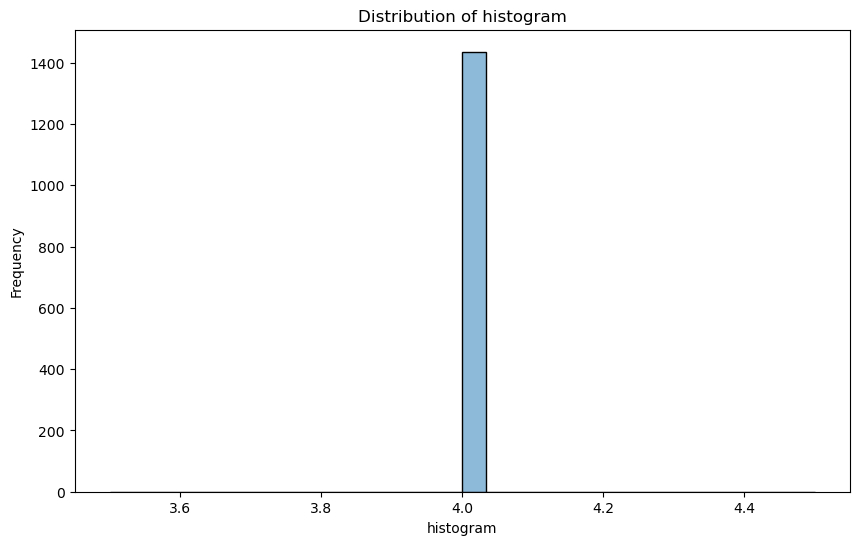

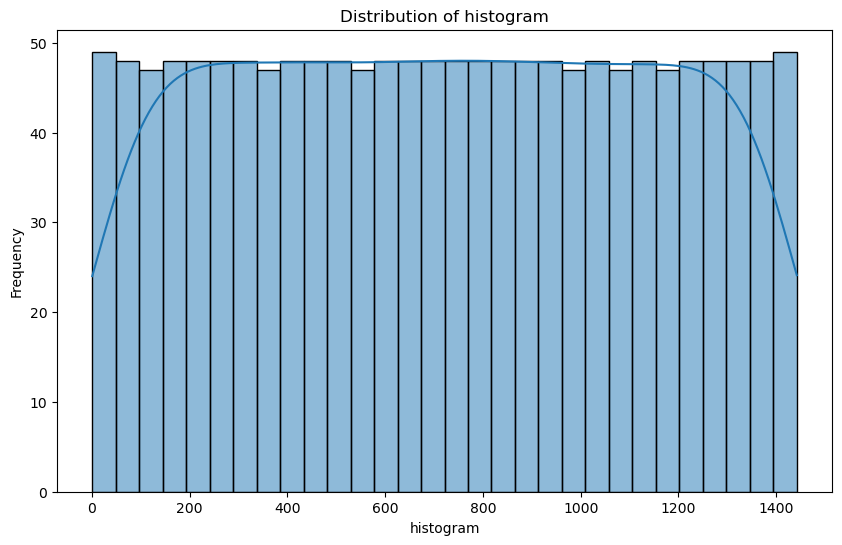

In [44]:
from utils import histogram


selected_features = ["Cylinders", "Id"]

for feature in selected_features:
    histogram(df[feature])

Efectivamente, no nos sirven en absoluto


Las vamos sacando


In [45]:
df = df.drop(columns=["Id", "Cylinders"])

Veamos qué onda las columnas que son banderas


In [46]:
bool_cols = []
for col in df.columns:
    uniques = df[col].dropna().unique()
    if set(uniques).issubset({0, 1}) and df[col].dtype in [np.int64, np.int32, np.int8]:
        bool_cols.append(col)
print(bool_cols)

['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']


Son varias, no sabemos qué significan


Buscamos en internet qué onda esas features, encontramos esto:


1. **Id**
   Identificador único de cada vehículo en el dataset.

2. **Model**
   Versión o acabado del Toyota Corolla (por ejemplo, “Corolla D”, “Corolla GLi”).

3. **Price**
   Precio de venta del automóvil (en la unidad monetaria del dataset, p. ej., euros u otra).

4. **Age_08_04**
   Edad del coche, en años, referida al 4 de agosto de 2004 (fecha de corte utilizada para calcular antigüedad).

5. **Mfg_Month**
   Mes de fabricación del vehículo (1 = enero … 12 = diciembre).

6. **Mfg_Year**
   Año de fabricación del vehículo.

7. **KM**
   Kilometraje recorrido por el coche (en kilómetros).

8. **Fuel_Type**
   Tipo de combustible:

   - “Petrol” (gasolina)
   - “Diesel” (diésel)
   - “CNG” (gas natural comprimido)

9. **HP**
   Potencia del motor en caballos de fuerza (Horse Power).

10. **Met_Color**
    Indicador de pintura metálica (1 = sí, 0 = no).

11. **Automatic**
    Tipo de transmisión (1 = automática, 0 = manual).

12. **cc**
    Cilindrada del motor en centímetros cúbicos (cm³).

13. **Doors**
    Número de puertas del vehículo.

14. **Cylinders**
    Número de cilindros del motor.

15. **Gears**
    Número de marchas de la transmisión.

16. **Quarterly_Tax**
    Importe del impuesto de circulación o matriculación que se paga trimestralmente (en la misma unidad monetaria que Price).

17. **Weight**
    Peso del vehículo en kilogramos.

18. **Mfr_Guarantee**
    Garantía del fabricante (1 = incluida, 0 = no incluida).

19. **BOVAG_Guarantee**
    Garantía ofrecida por BOVAG (asociación neerlandesa de concesionarios) (1 = incluida, 0 = no).

20. **Guarantee_Period**
    Duración de la garantía (en años).

21. **ABS**
    Sistema antibloqueo de frenos (Anti-lock Braking System) (1 = sí, 0 = no).

22. **Airbag_1**
    Airbag para el conductor (1 = sí, 0 = no).

23. **Airbag_2**
    Airbag para el pasajero delantero (1 = sí, 0 = no).

24. **Airco**
    Aire acondicionado (1 = sí, 0 = no).

25. **Automatic_airco**
    Control automático de la temperatura (climatizador) (1 = sí, 0 = no).

26. **Boardcomputer**
    Ordenador de a bordo (display con información de viaje, consumo, etc.) (1 = sí, 0 = no).

27. **CD_Player**
    Reproductor de CD (1 = sí, 0 = no).

28. **Central_Lock**
    Cierre centralizado de puertas (1 = sí, 0 = no).

29. **Powered_Windows**
    Elevalunas eléctricos (1 = sí, 0 = no).

30. **Power_Steering**
    Dirección asistida (1 = sí, 0 = no).

31. **Radio**
    Radio estándar (1 = sí, 0 = no).

32. **Mistlamps**
    Faros antiniebla (1 = sí, 0 = no).

33. **Sport_Model**
    Edición deportiva del modelo (1 = sí, 0 = no).

34. **Backseat_Divider**
    Separador o consola entre asientos traseros (1 = sí, 0 = no).

35. **Metallic_Rim**
    Llantas de aleación metálica (1 = sí, 0 = no).

36. **Radio_cassette**
    Radio con reproductor de casete (1 = sí, 0 = no).

37. **Tow_Bar**
    Enganche de remolque o bola de remolque (1 = sí, 0 = no).


Veamos qué peso tienen sobre la variable objetivo, podemos hacer una matriz de correlación solamente de las banderas, a ver si son importantes


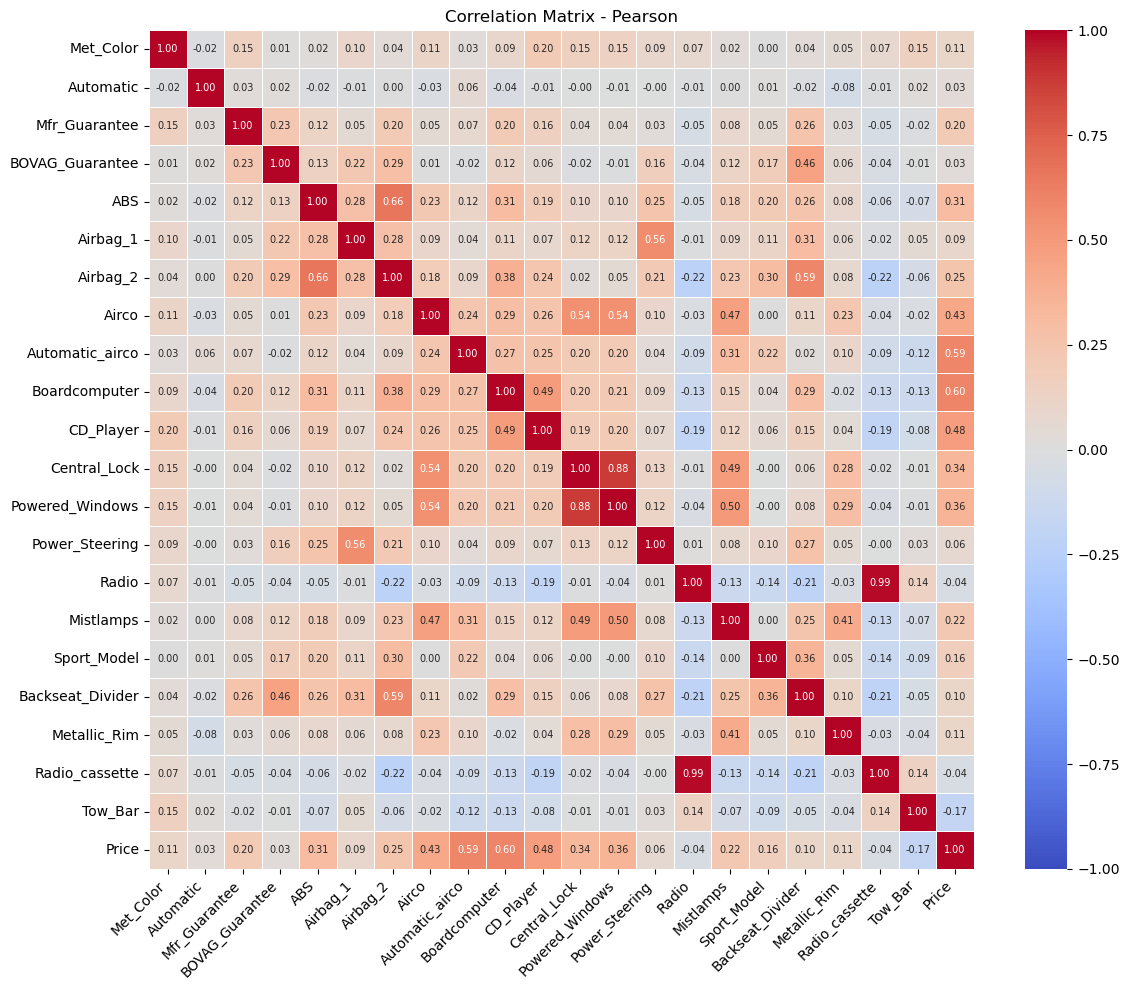

In [47]:
from utils import show_correlation_matrix


matrix = show_correlation_matrix(df[bool_cols + ["Price"]])

Lo primero que llama la atención es la correlación tan fuerte que existe entre radio y radio_cassette. Tiene sentido. Nos podemos quedar con una nomás, ambas tienen el mismo peso sobre Price.


In [48]:
# Contar filas donde Radio y Radio_cassette difieren
diferentes = (df["Radio"] != df["Radio_cassette"]).sum()
print(f"Número de filas con valores distintos entre 'Radio' y 'Radio_cassette': {diferentes}")
print(f"Número de filas con valores iguales entre 'Radio' y 'Radio_cassette': {len(df) - diferentes}")

Número de filas con valores distintos entre 'Radio' y 'Radio_cassette': 3
Número de filas con valores iguales entre 'Radio' y 'Radio_cassette': 1433


Prácticamente siempre que hay radio hay radio cassette, borramos una


In [49]:
df = df.drop(columns=["Radio_cassette"])

Más allá de radio y radio_cassette, por comprensión del dominio, creemos que todas las demás correlaciones medianamente fuertes (no hay ninguna por encima de 0.60) son completamente dadas por el azar. Por ejemplo power_steering y airbag_1, o board_computer y CD_Player.


Seguimos mirando las variables


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.0,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0


El mes de manufactura no debería servir así como está planteado, lo verificamos:


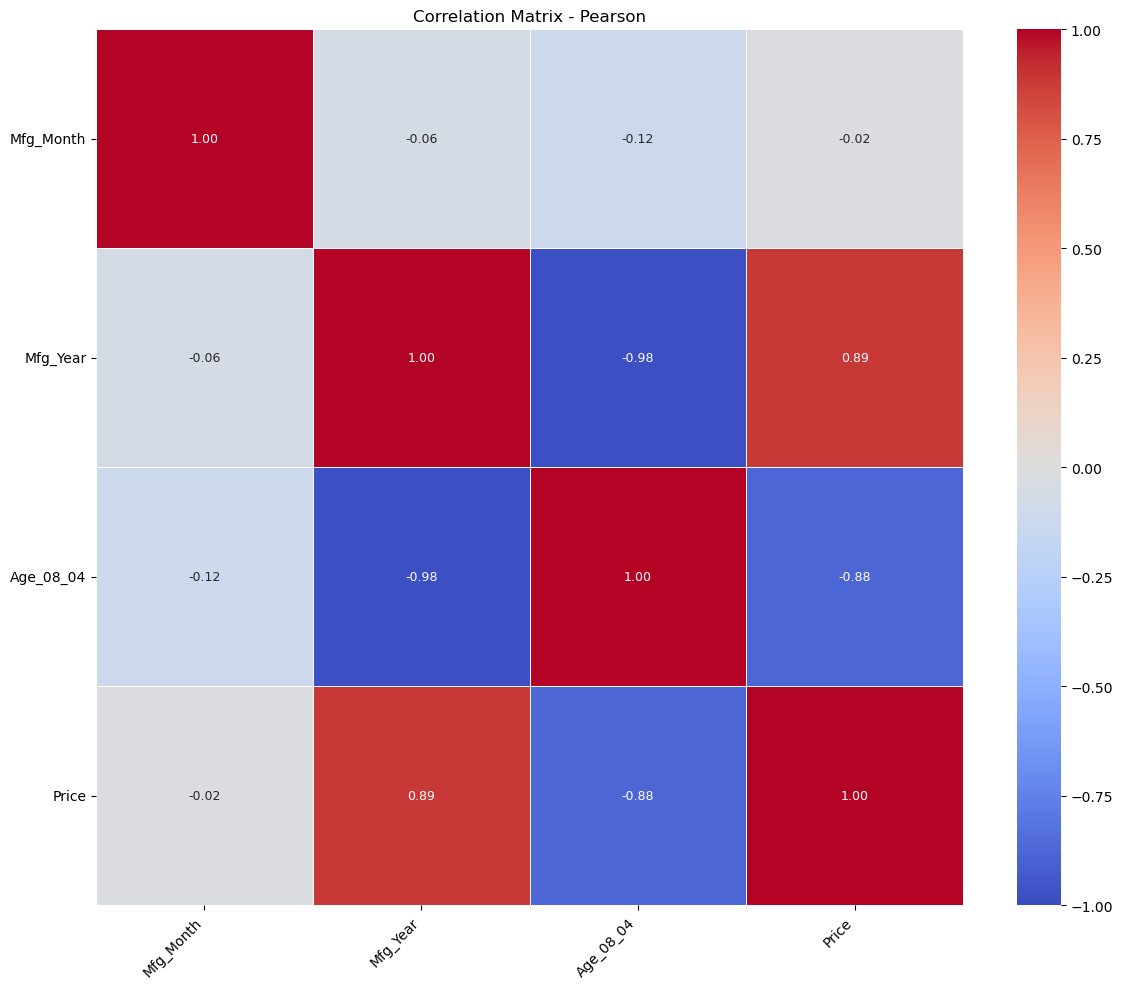

In [51]:
matrix = show_correlation_matrix(df[["Mfg_Month", "Mfg_Year", "Age_08_04", "Price"]])

Como sospechábamos, el mes por sí solo no tiene ningún peso sobre el precio. Y columnas como año y edad son mucho más importantes. Nos deshacemos de la columna mes, no hay nada que rescatarle.


In [52]:
df = df.drop(columns=["Mfg_Month"])

Vamos explorando otro lado, veamos lo de automatic


Empezamos con un histograma, para ver cómo está distribuida esta clase


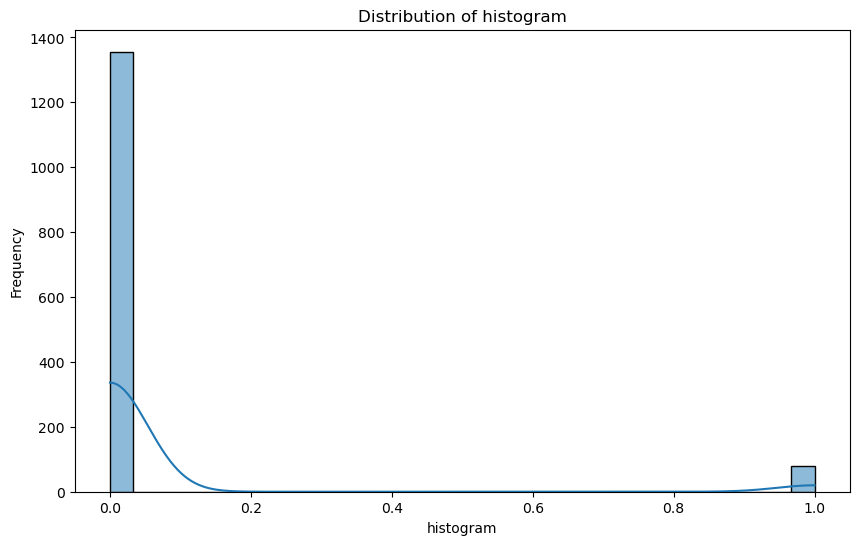

In [53]:
histogram(df["Automatic"])

In [54]:
# Calcular porcentaje de filas con Automatic igual a 1 (True) y 0 (False)
total = len(df)
pct_true = (df["Automatic"] == 1).sum() / total * 100
pct_false = (df["Automatic"] == 0).sum() / total * 100

print(f"Porcentaje con Automatic=True: {pct_true:.2f}%")
print(f"Porcentaje con Automatic=False: {pct_false:.2f}%")

Porcentaje con Automatic=True: 5.57%
Porcentaje con Automatic=False: 94.43%


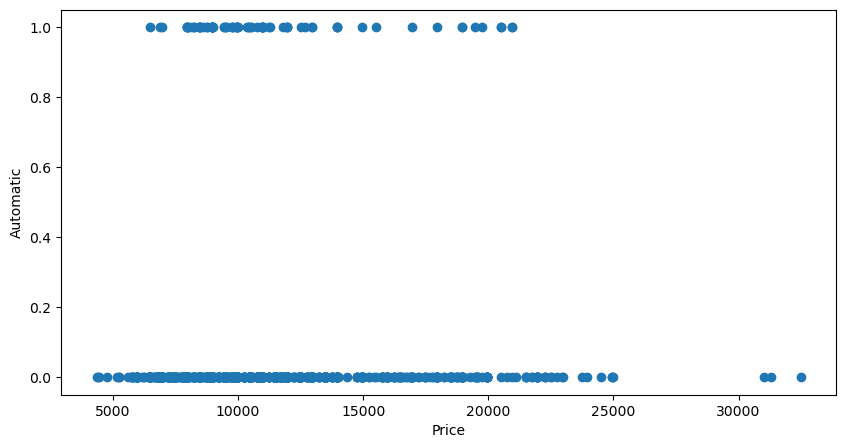

In [55]:
from utils import scatter_plot


scatter_plot(df["Price"], df["Automatic"])

Veamos de qué año son los automáticos, capaz por edad valen menos


In [56]:
precio_promedio_automaticos = df[df["Automatic"] == 1].groupby("Mfg_Year")["Price"].mean().sort_index()
precio_promedio_no_automaticos = df[df["Automatic"] == 0].groupby("Mfg_Year")["Price"].mean().sort_index()
precios_promedio = pd.DataFrame({
    "Automático": precio_promedio_automaticos,
    "Manual": precio_promedio_no_automaticos
})

print(precios_promedio)

            Automático        Manual
Mfg_Year                            
1998       8553.571429   7877.260989
1999      10020.961538   9295.638554
2000      11898.571429  10690.866972
2001      13029.375000  12242.173913
2002      18133.333333  16890.543210
2003      20320.000000  18562.828571
2004               NaN  22324.166667


Bueno, algo de influencia se ve, alrededor de mil dólares más.


Pero la clase está muy desbalanceada, veremos más adelante si vale la pena rescatar esta feature.


Aquí queremos ver si existen features que sean iguales entre sí, es decir si tienen todas el mismo valor 1 al mismo tiempo, y ver si se puede crear otra feature a partir de ellas


In [57]:
from collections import defaultdict

# Calculamos bools cols devuelta porque ya borramos cosas antes
bool_cols = []
for col in df.columns:
    uniques = df[col].dropna().unique()
    if set(uniques).issubset({0, 1}) and df[col].dtype in [np.int64, np.int32, np.int8]:
        bool_cols.append(col)

groups = defaultdict(list)
for col in bool_cols:
    key = tuple(df[col].fillna(-1))
    groups[key].append(col)

duplicate_groups = [cols for cols in groups.values() if len(cols) > 1]

if duplicate_groups:
    print("Las siguientes columnas binarias son idénticas en todas las filas:")
    for group in duplicate_groups:
        print("  -", ", ".join(group))
else:
    print("No se encontraron columnas binarias idénticas entre sí.")

No se encontraron columnas binarias idénticas entre sí.


Bueno a primera vista no hay observaciones con todas las banderas con el mismo valor, más adelante vamos a seguir viendo esto.


Le peguemos un vistazo a met_color a ver en qué consiste


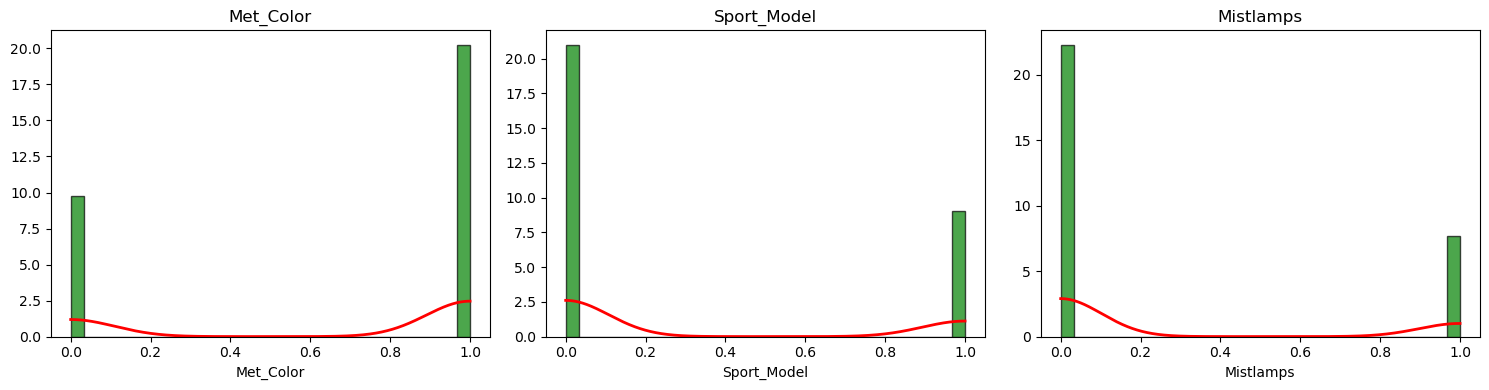

In [58]:
from utils import histogram_by_batch


cols = ["Met_Color", "Sport_Model", "Mistlamps"]

histogram_by_batch(df[cols])

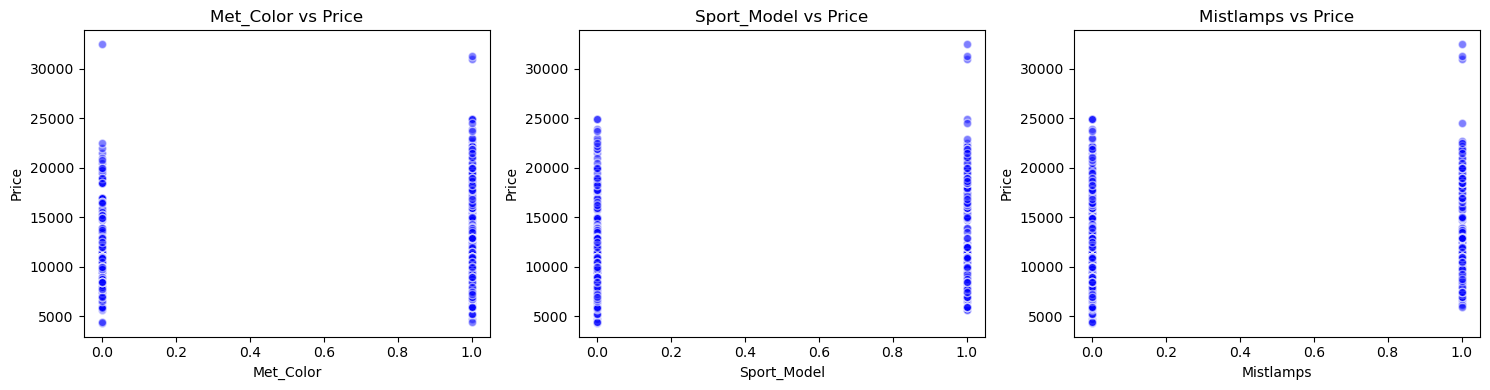

In [59]:
from utils import scatter_plots_by_batch


cols = ["Met_Color", "Sport_Model", "Mistlamps", "Price"]

scatter_plots_by_batch(df[cols])

Analizamos Model


In [60]:
df["Model"]

0           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
1           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
2          ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
3           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
4             TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors
                              ...                        
1431           TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors
1432    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1433    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1434    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1435          TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors
Name: Model, Length: 1436, dtype: object

Observamos que la feature model contiene una descripcion del modelo y de lo que incluye, como la cilindrada, cantidad de puertas, la carroceria en algunos casos. Quizás podemos extraerle algo util para analizar.

In [62]:
df["Doors"].value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

Hemos detectado una inconsistencia entre las columnas **Model** y **Doors**: mientras que **Model** identifica versiones de 3 puertas, la columna **Doors** sólo registra el valor “2” para algunos casos. Esto indica que durante la carga del conjunto de datos se perdieron o sobrescribieron valores. Para corregirlo, extraeremos el número de puertas indicado en **Model** y lo imputaremos en **Doors**, restaurando así la información correcta.


También trataremos de ver si podemos extraer algunas features derivadas de Model

In [63]:
# 1. Normalizar Model
df["Model_Clean"] = (
    df["Model"]
    .str.strip()
    .str.lstrip("?")
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

# 2. Extraer features
df["Brand"] = df["Model_Clean"].str.extract(r"^(Toyota)")
df["Series"] = df["Model_Clean"].str.extract(r"^Toyota\s+(\w+)")
df["Engine_Size"] = df["Model_Clean"].str.extract(r"(\d\.\d)")
df["Engine_Tech"] = df["Model_Clean"].str.extract(
    r"\b([Dd]\d[Dd]|Vvtli|Vvtl[Ii])\b", expand=False
)
df["Body_Style"] = df["Model_Clean"].str.extract(
    r"\b(Hatchback|Hatchb|Sedan|Wagon|Coupe|Convertible|Mpv|Verso|Stationwagen|Sw|Station)\b",
    expand=False,
)
df["Trim"] = df["Model_Clean"].str.extract(
    r"\b(Terra|Sol|Sport(?:\s*\w*)?|T-Sport|T Sport Bns?)\b", expand=False
)
df["Model_Len"] = df["Model_Clean"].str.len()
df["Model_Words"] = df["Model_Clean"].str.split().str.len()

# 3. Guardar Doors original
orig_doors = pd.to_numeric(df["Doors"], errors="coerce").astype("Int64")

# 4. Extraer puertas del texto
raw = df["Model_Clean"].str.extract(
    r"(\d(?:/\d)?)(?=\s*[-\s]?(?:Doors?|Drs?))", expand=False
)


def normalize(val):
    if pd.isna(val):
        return pd.NA
    return max(map(int, val.split("/"))) if "/" in val else int(val)


df["Doors_extracted"] = raw.apply(normalize).astype("Int64")

# 5. Inferir por Body_Style
body_map = {
    "Sedan": 4,
    "Hatchback": 5,
    "Hatchb": 5,
    "Wagon": 5,
    "Stationwagen": 5,
    "Sw": 5,
    "Station": 5,
    "Mpv": 5,
    "Verso": 5,
    "Coupe": 3,
    "Convertible": 3,
}
mask_inf = df["Doors_extracted"].isna() & df["Body_Style"].notna()
df.loc[mask_inf, "Doors_extracted"] = df.loc[mask_inf, "Body_Style"].map(body_map)

# 6. Mapeo manual si aún falta
manual_map = {"Gli": 4, "XLi": 4, "E-Four": 4, "XEi": 4, "16V": 4}


def assign_manual(m):
    for k, v in manual_map.items():
        if k.lower() in m.lower():
            return v
    return pd.NA


mask_man = df["Doors_extracted"].isna()
df.loc[mask_man, "Doors_extracted"] = (
    df.loc[mask_man, "Model_Clean"].apply(assign_manual).astype("Int64")
)

# 7. Combinar original vs extraído (tomar el mayor)
combined = pd.concat(
    [orig_doors.fillna(0), df["Doors_extracted"].fillna(0)], axis=1
).max(axis=1)
df["Doors"] = combined.replace({0: pd.NA}).astype("Int64")

# 8. **FORZAR 3 o 5 para TODAS** las filas
five_styles = {
    "Hatchback",
    "Hatchb",
    "Wagon",
    "Stationwagen",
    "Sw",
    "Station",
    "Mpv",
    "Verso",
}


def force_3_or_5(row):
    d = row["Doors"]
    return d if d in (3, 5) else (5 if row["Body_Style"] in five_styles else 3)


df["Doors"] = df.apply(force_3_or_5, axis=1).astype("Int64")

# 9. Limpiar auxiliar
df.drop(columns=["Doors_extracted"], inplace=True)

# 10. Resultado
print(df[["Model_Clean", "Doors"]])
print("\nDistribución de Doors:")
print(df["Doors"].value_counts(dropna=False))

                                            Model_Clean  Doors
0         Toyota Corolla 2.0 D4D Hatchb Terra 2/3-Doors      3
1         Toyota Corolla 2.0 D4D Hatchb Terra 2/3-Doors      3
2         Toyota Corolla 2.0 D4D Hatchb Terra 2/3-Doors      3
3         Toyota Corolla 2.0 D4D Hatchb Terra 2/3-Doors      3
4           Toyota Corolla 2.0 D4D Hatchb Sol 2/3-Doors      3
...                                                 ...    ...
1431         Toyota Corolla 1.3 16V Hatchb G6 2/3-Doors      3
1432  Toyota Corolla 1.3 16V Hatchb Linea Terra 2/3-...      3
1433  Toyota Corolla 1.3 16V Hatchb Linea Terra 2/3-...      3
1434  Toyota Corolla 1.3 16V Hatchb Linea Terra 2/3-...      3
1435        Toyota Corolla 1.6 Lb Linea Terra 4/5-Doors      5

[1436 rows x 2 columns]

Distribución de Doors:
Doors
5    812
3    624
Name: count, dtype: Int64


Después de corregir la feature Doors veremos cómo quedó

In [65]:
df["Doors"].value_counts()

Doors
5    812
3    624
Name: count, dtype: Int64

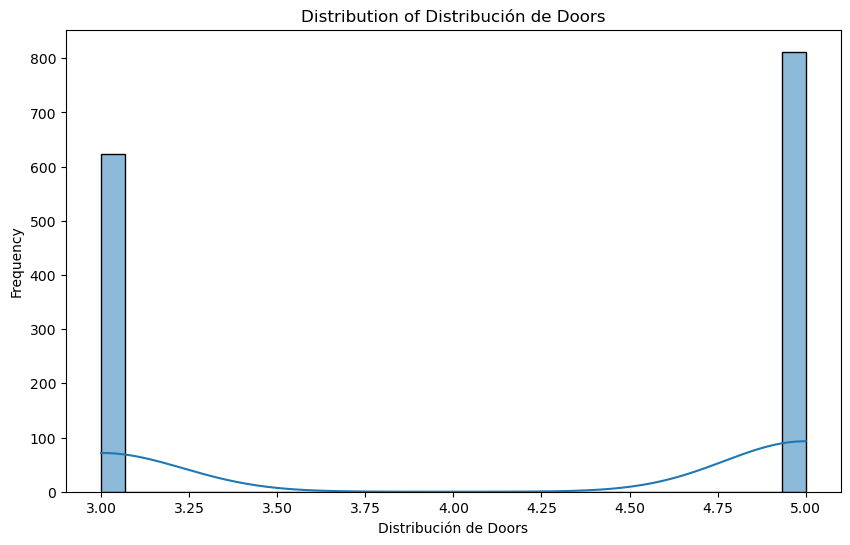

In [ ]:
hist = histogram(df["Doors"], title="Distribución de Doors")

In [27]:
df.drop(
    columns=["Model", "Model_Clean", "Model_Len", "Model_Words"],
    inplace=True,
    axis=1,
    errors="ignore",
)
print(df.columns.tolist())

['Price', 'Age_08_04', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Tow_Bar', 'Brand', 'Series', 'Engine_Size', 'Engine_Tech', 'Body_Style', 'Trim']


## Eliminación de valores nulos


In [28]:
# Seleccionar columnas numéricas
numeric_df = df.select_dtypes(include="number")

# Verificar si hay valores negativos
negativos_bool = (numeric_df < 0).any()

# Convertir a DataFrame con nombre de columna y booleano
negativos_df = negativos_bool.reset_index()
negativos_df.columns = ["columna", "tiene_valores_negativos"]

# Mostrar el resultado
negativos_df

,columna,tiene_valores_negativos
0,Price,False
1,Age_08_04,False
2,Mfg_Year,False
3,KM,False
4,HP,False
5,Met_Color,False
6,Automatic,False
7,cc,False
8,Doors,False
9,Gears,False


# Limpieza de datos


In [29]:
# Sacamos las columnas que no nos interesan
df = df.drop(columns=["Id"], axis=1, errors="ignore")
df

,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,...,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar,Brand,Series,Engine_Size,Engine_Tech,Body_Style,Trim
0,13500,23,2002,46986,Diesel,90,1,0,2000,3,...,0,1,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Terra
1,13750,23,2002,72937,Diesel,90,1,0,2000,3,...,0,1,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Terra
2,13950,24,2002,41711,Diesel,90,1,0,2000,3,...,0,1,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Terra
3,14950,26,2002,48000,Diesel,90,0,0,2000,3,...,0,1,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Terra
4,13750,30,2002,38500,Diesel,90,0,0,2000,3,...,0,1,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Sol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,1998,20544,Petrol,86,1,0,1300,3,...,1,1,0,0,Toyota,Corolla,1.3,NaN,Hatchb,NaN
1432,10845,72,1998,19000,Petrol,86,0,0,1300,3,...,1,1,0,0,Toyota,Corolla,1.3,NaN,Hatchb,Terra
1433,8500,71,1998,17016,Petrol,86,0,0,1300,3,...,0,1,0,0,Toyota,Corolla,1.3,NaN,Hatchb,Terra
1434,7250,70,1998,16916,Petrol,86,1,0,1300,3,...,0,1,0,0,Toyota,Corolla,1.3,NaN,Hatchb,Terra


In [30]:
# 1. Obtener el número de nulos por columna
null_counts = df.isnull().sum()

# 2. Filtrar solo columnas con al menos un nulo
null_counts = null_counts[null_counts > 0]

# 3. Mostrar el resultado
print(null_counts)

Engine_Size       8
Engine_Tech    1391
Body_Style      744
Trim            379
dtype: int64


## Detección de valores duplicados


In [31]:
def duplicados_con_indices(df):
    resultado = []

    for i in range(len(df)):
        fila_actual = df.iloc[i]
        duplicado_en = False

        for j in range(i):
            if df.iloc[j].equals(fila_actual):
                duplicado_en = j
                break

        resultado.append({"Fila": i, "Duplicado_de": duplicado_en})

    # Convertir la lista de resultados en un DataFrame
    df_resultado = pd.DataFrame(resultado)
    return df_resultado


df_re = duplicados_con_indices(df)

In [32]:
# Crear una columna 'dup_col' que marca los duplicados según df_re
dup_col = "Duplicado_de"
df[dup_col] = False
for idx, orig in zip(df_re["Fila"], df_re["Duplicado_de"]):
    df.at[idx, dup_col] = orig

# 1) Filtrar las filas marcadas
df_dup = df.loc[df[dup_col] != False]

# 2) Sacar índices de duplicados y de sus originales
dup_idxs = df_dup.index.tolist()
orig_idxs = df_dup[dup_col].tolist()

# 3) Unión única y ordenada de índices
all_idxs = sorted(set(dup_idxs + orig_idxs))

# 4) Extraer esas filas completas
pd.set_option("display.max_columns", None)
df_pairs = df.loc[all_idxs]

# 5) Mostrar resultado
df_pairs

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6348\3713070607.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '112' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.at[idx, dup_col] = orig


,Price,Age_08_04,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar,Brand,Series,Engine_Size,Engine_Tech,Body_Style,Trim,Duplicado_de
112,24950,8,2004,13253,Diesel,116,1,0,2000,5,5,234,1320,0,0,3,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,Toyota,Corolla,2.0,D4D,Verso,Sol,False
113,24950,8,2004,13253,Diesel,116,1,0,2000,5,5,234,1320,0,0,3,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,Toyota,Corolla,2.0,D4D,Verso,Sol,112


In [33]:
# Verificar si hay columnas constantes
columnas_cte = df.columns[df.nunique() == 1]
print("Columnas constantes:", columnas_cte.tolist())

Columnas constantes: ['Brand', 'Series']


In [34]:
# borrar columnas constantes
df.drop(columns=["Cylinders", "Brand", "Series"], axis=1, inplace=True)
df

KeyError: "['Cylinders'] not found in axis"

In [ ]:
# Mostrar cantidad de outliers por columna
resumen = resumen_outliers(df)
resumen

,Outliers_IQR,Outliers_Zscore
Price,110,90
Age_08_04,7,68
Mfg_Month,0,0
Mfg_Year,0,99
KM,49,64
HP,11,46
Met_Color,0,0
Automatic,80,80
cc,123,1
Doors,0,0


In [ ]:
# ------------------------------------------------
# Detectar columnas con valores continuos en `df`
# ------------------------------------------------

from pandas.api.types import is_float_dtype, is_integer_dtype

# Umbral mínimo de valores únicos para considerar un entero como “continuo”
INT_UNIQUE_THRESHOLD = 20

continuous_features = []
for col in df.columns:
    series = df[col]
    # Si es float, lo consideramos continuo
    if is_float_dtype(series):
        continuous_features.append(col)
    # Si es entero y tiene muchos valores únicos, también lo consideramos continuo
    elif is_integer_dtype(series) and series.nunique() > INT_UNIQUE_THRESHOLD:
        continuous_features.append(col)

print("Features continuas detectadas:")
for feat in continuous_features:
    print(f" - {feat} (dtype={df[feat].dtype}, únicos={df[feat].nunique()})")

Features continuas detectadas:
 - Price (dtype=int64, únicos=236)
 - Age_08_04 (dtype=int64, únicos=77)
 - KM (dtype=int64, únicos=1263)
 - Weight (dtype=int64, únicos=59)


In [ ]:
# Define tus cortes manuales
bins = [df["Quarterly_Tax"].min() - 1, 100, 150, 200, df["Quarterly_Tax"].max()]
labels = [1, 2, 3, 4]

# Crea la categoría
df["Tax_RangeCat"] = pd.cut(df["Quarterly_Tax"], bins=bins, labels=labels).astype(int)

# Muestra la relación entre Quarterly_Tax y la nueva categoría
print(
    df[["Quarterly_Tax", "Tax_RangeCat"]]
    .drop_duplicates()
    .sort_values("Quarterly_Tax")
    .reset_index(drop=True)
)

    Quarterly_Tax  Tax_RangeCat
0              19             1
1              40             1
2              64             1
3              69             1
4              72             1
5              85             1
6             100             1
7             163             3
8             185             3
9             197             3
10            210             4
11            234             4
12            283             4


In [ ]:
df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Engine_Size,Engine_Tech,Body_Style,Trim,Duplicado_de,Tax_RangeCat
0,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,2.0,D4D,Hatchb,Terra,False,4
1,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,2.0,D4D,Hatchb,Terra,False,4
2,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2.0,D4D,Hatchb,Terra,False,4
3,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2.0,D4D,Hatchb,Terra,False,4
4,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,2.0,D4D,Hatchb,Sol,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,Petrol,86,1,0,1300,3,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,1.3,NaN,Hatchb,NaN,False,1
1432,10845,72,9,1998,19000,Petrol,86,0,0,1300,3,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1.3,NaN,Hatchb,Terra,False,1
1433,8500,71,10,1998,17016,Petrol,86,0,0,1300,3,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1.3,NaN,Hatchb,Terra,False,1
1434,7250,70,11,1998,16916,Petrol,86,1,0,1300,3,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.3,NaN,Hatchb,Terra,False,1


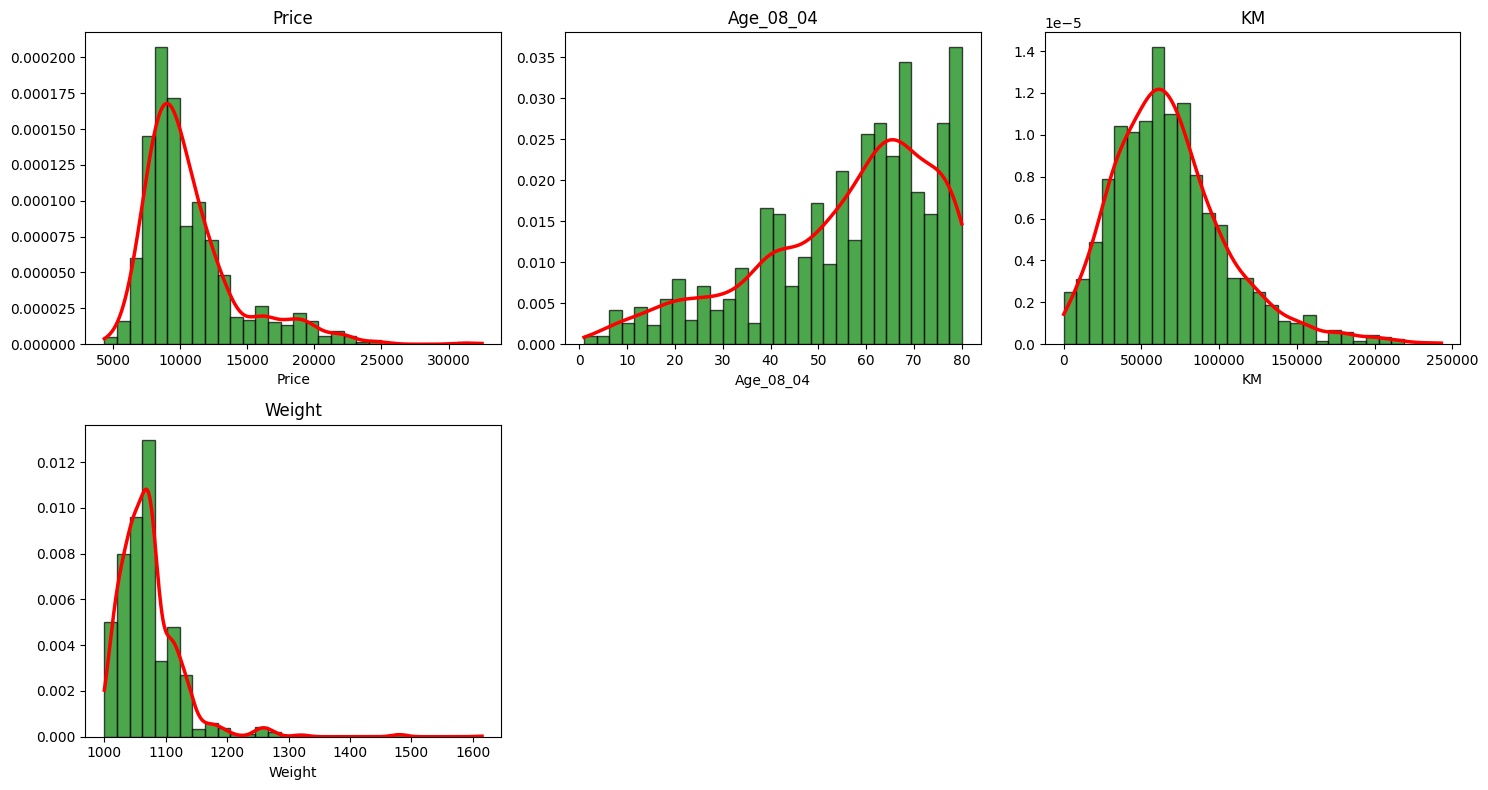

In [ ]:
# Primero ponemos las continuas en un nuevo DataFrame
df_toyota_continuas = df[continuous_features].copy()

# Ahora veremos BoxPlots e Histogramas con sus curva de densidad
histogram_por_lotes(df_toyota_continuas, 6)

Index(['Price', 'Age_08_04', 'KM', 'Weight'], dtype='object')


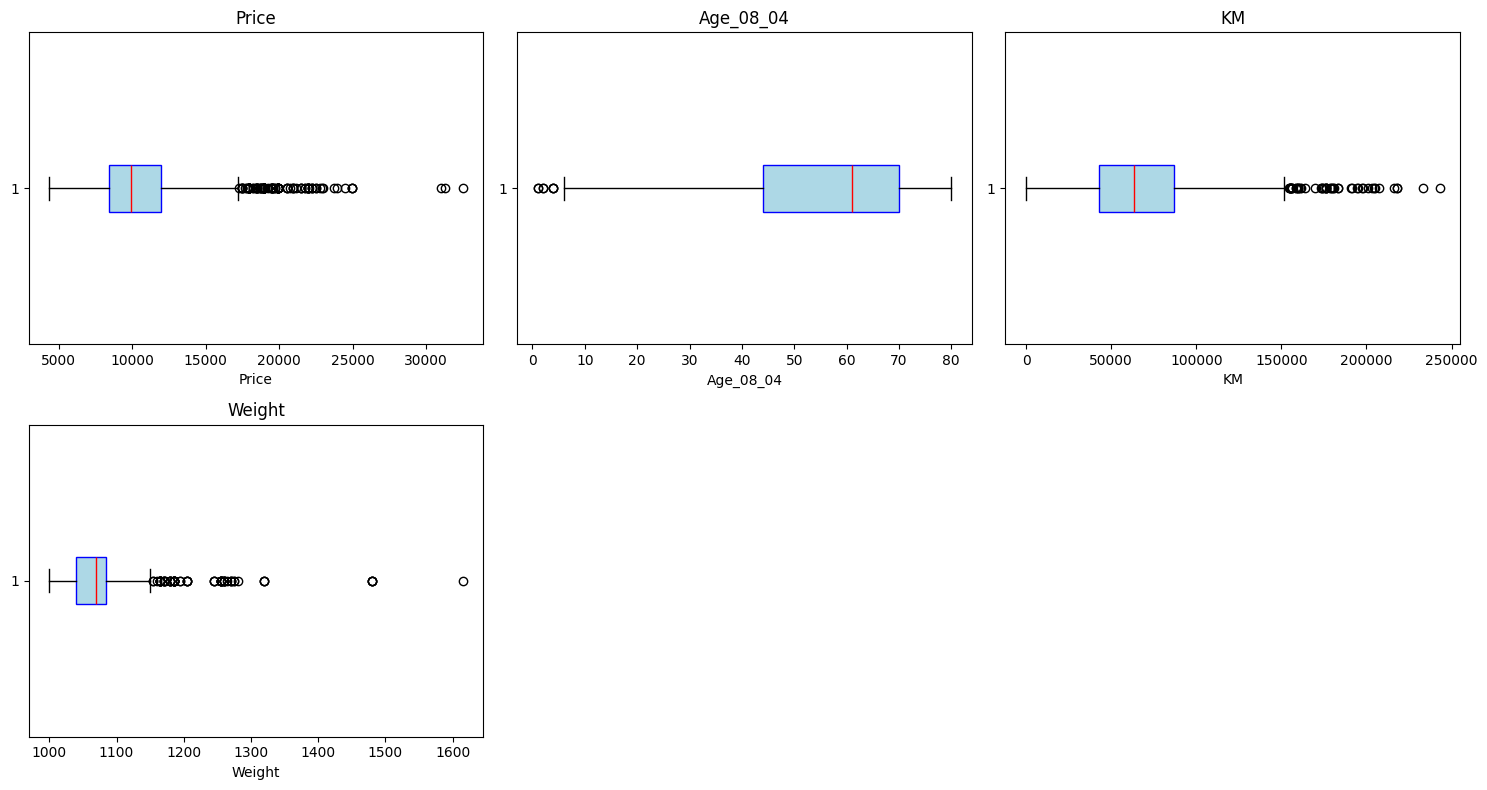

In [ ]:
boxplots_por_lotes(df_toyota_continuas, 6)

---

### Price

* **Distribución**: el histograma muestra una distribución con pico principal entre \$8 000 y \$12 000, con una larga cola hacia la derecha que llega hasta \$30 000. La curva de densidad confirma ese sesgo positivo.
* **Boxplot**: la mediana está cerca de \$10 000; el IQR va aproximadamente de \$8 000 a \$12 000. Hay muchos valores atípicos por encima de \$15 000, que corresponden a modelos o equipamientos premium.
* **Interpretación**: la mayoría de los coches se cotizan en un rango estrecho, pero existen unos pocos vehículos de alto precio que inflan la cola, por lo que conviene una transformación (por ejemplo, log) o tratar outliers antes de modelar.

---

### Age_08_04

- **Distribución**: el histograma es prácticamente creciente desde valores bajos hasta el máximo (\~80), y la densidad señala que hay un acumulado mayor en edades altas. No es simétrica: hay más coches "viejos".
- **Boxplot**: la mediana está en torno a 60–65, el IQR entre \~50 y \~70, con algunos autos muy recientes (cerca de 0) como outliers en la izquierda.
- **Interpretación**: la flota tiende a concentrarse en edades entre 50 y 80 años (o unidades de medida), con pocos vehículos nuevos. Al modelar, podría ser útil agrupar edades muy bajas o muy altas o usar técnicas robustas a outliers.

---

### KM

- **Distribución**: el histograma con KDE presenta un solo pico alrededor de 50 000–75 000 km y luego una cola larga hacia la derecha hasta >200 000 km.
- **Boxplot**: la mediana se sitúa cerca de 75 000 km; el IQR va de \~50 000 a \~100 000 km. Varios outliers por encima de 150 000 km.
- **Interpretación**: la mayoría de los vehículos tienen kilometrajes moderados, pero existe un subgrupo con uso intensivo. Para regresión podría convenir una transformación (raíz o log) y evaluar si recortar o imputar outliers.

---

### Weight

- **Distribución**: el histograma muestra un pico muy marcado entre 1 000 y 1 100 kg, con una cola derecha que llega hasta 1 600 kg; la densidad refleja un sesgo ligero a la derecha.
- **Boxplot**: la mediana ronda 1 050 kg, el IQR entre \~1 015 y \~1 100 kg, con algunos valores muy pesados como outliers.
- **Interpretación**: el peso es bastante homogéneo (la mayoría alrededor de \~1 050 kg), pero hay versiones más pesadas que conviene revisar (p. ej. carrocerías especiales o variante 4×4). Para modelar, quizá baste winsorizar esos pocos valores extremos.

---

**Resumen general**:

- **Precio** y **KM** presentan sesgo positivo y varios outliers altos.
- **Edad** está sesgada hacia valores altos, con pocos coches muy nuevos.
- **Peso** es la más concentrada, aunque con alguna cola derecha.


In [ ]:
# Variables enteras

df_toyota_enteras = df.copy()
df_toyota_enteras.drop(
    columns=[
        "Price",
        "Quarterly_Tax",
        "Weight",
        "KM",
        "Mfr_Guarantee",
        "BOVAG_Guarantee",
        "ABS",
        "Airbag_1",
        "Airbag_2",
        "Airco",
        "Automatic_airco",
        "Boardcomputer",
        "CD_Player",
        "Central_Lock",
        "Met_Color",
        "Powered_Windows",
        "Power_Steering",
        "Radio",
        "Mistlamps",
        "Sport_Model",
        "Backseat_Divider",
        "Metallic_Rim",
        "Radio_cassette",
        "Tow_Bar",
        "Age_08_04_calculada",
        "Fuel_Type",
        "Automatic",
    ],
    axis=1,
    inplace=True,
    errors="ignore",  # Ignore if any column is missing
)

In [ ]:
df_toyota_enteras.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.0,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.0,5.0,8.0,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.0,2004.0
HP,1436.0,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
cc,1436.0,1576.85585,424.38677,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1436.0,4.130919,0.991738,3.0,3.0,5.0,5.0,5.0
Gears,1436.0,5.026462,0.18851,3.0,5.0,5.0,5.0,6.0
Guarantee_Period,1436.0,3.81546,3.011025,3.0,3.0,3.0,3.0,36.0
Tax_RangeCat,1436.0,1.238162,0.70959,1.0,1.0,1.0,1.0,4.0


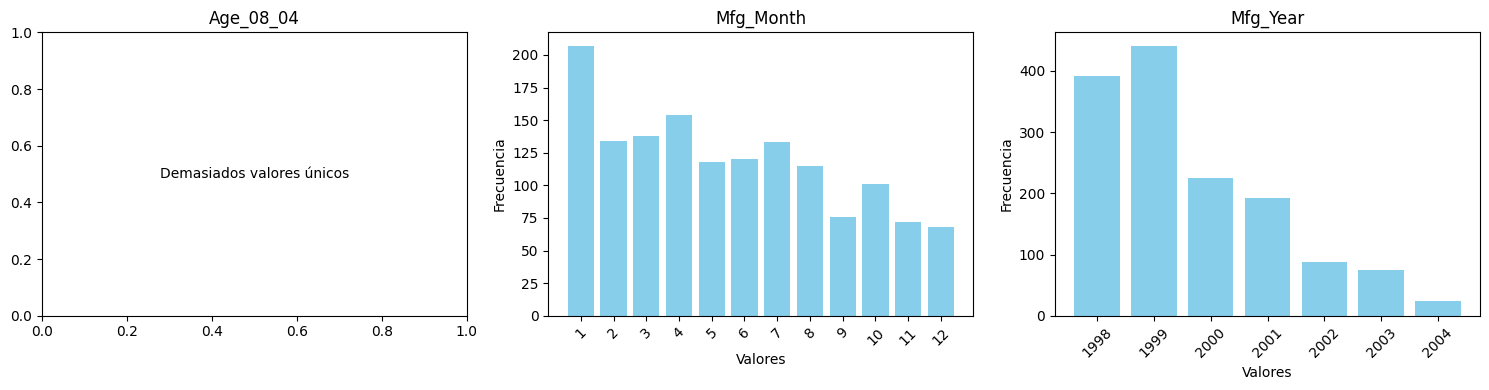

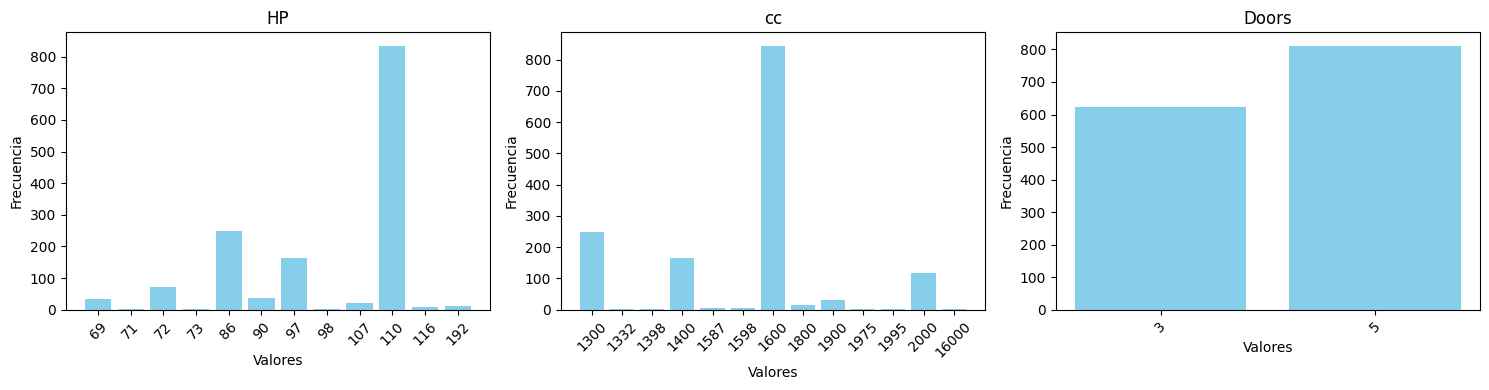

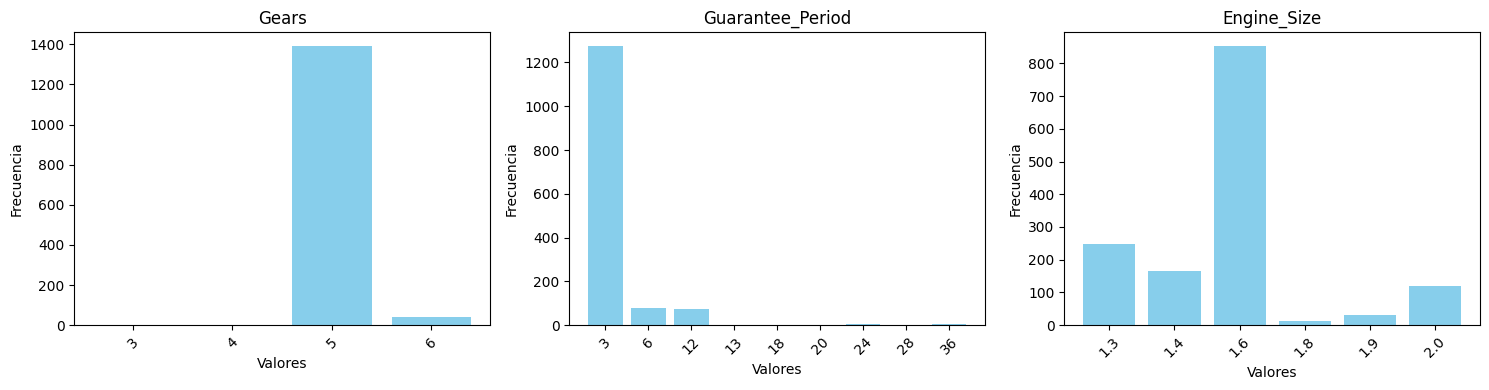

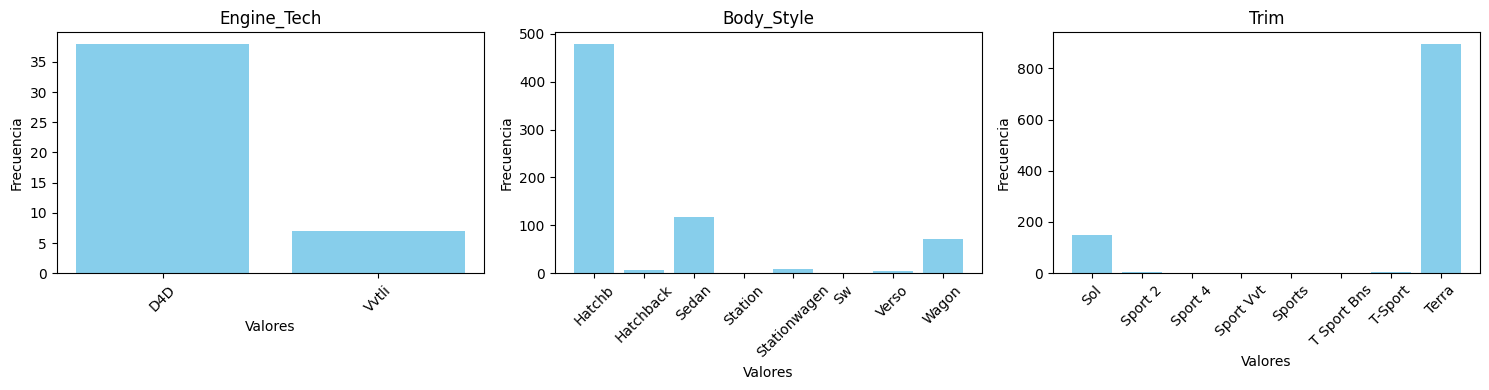

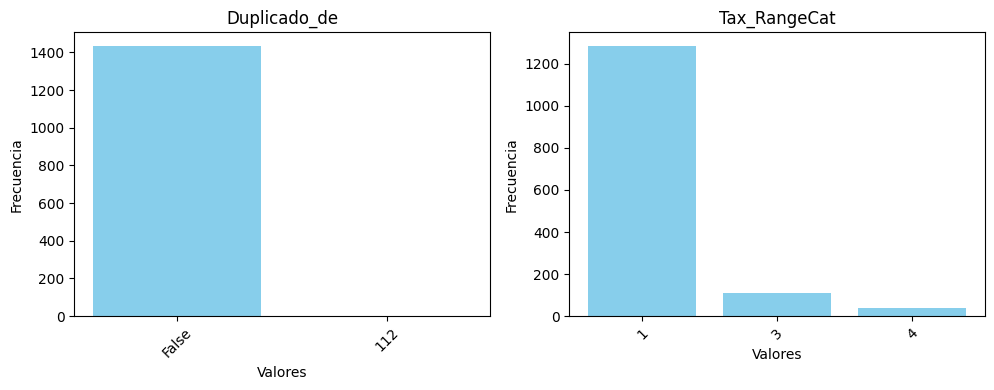

In [ ]:
bar_por_lotes(df_toyota_enteras, 3)

# Eliminación de outliers en Price


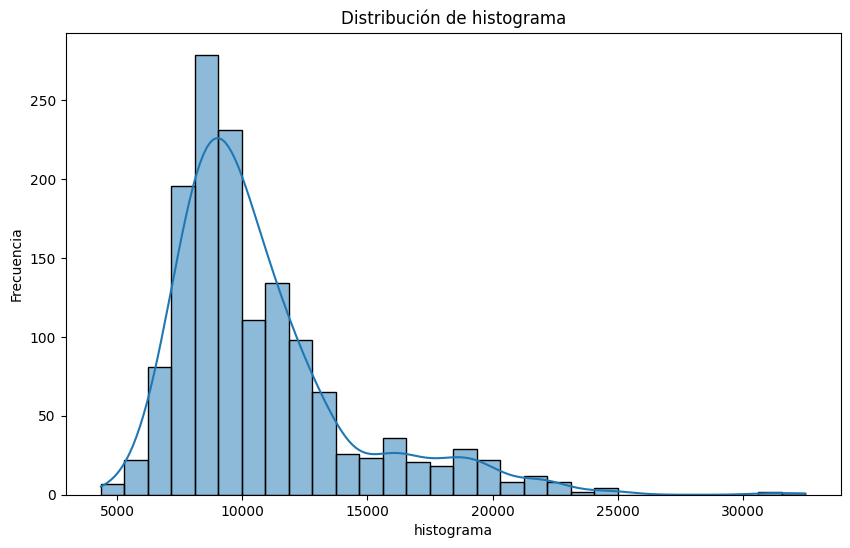

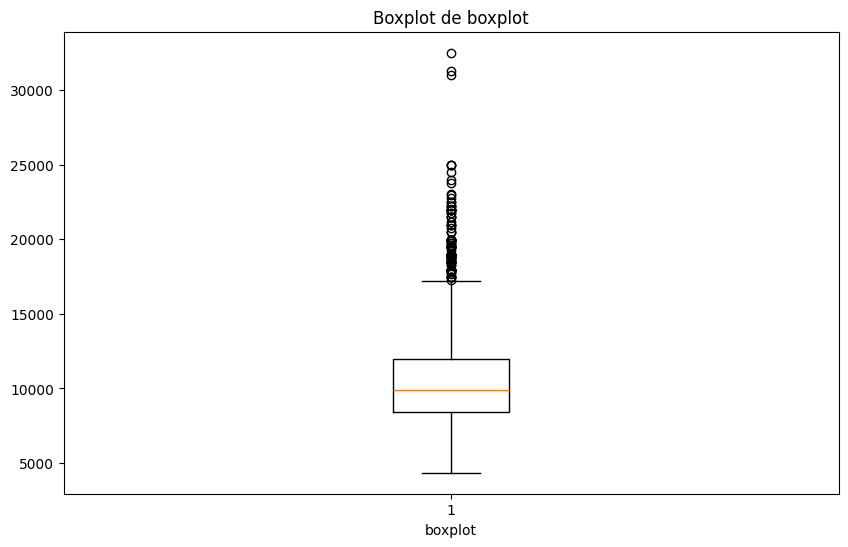

In [ ]:
# Eliminacion de outliers y/o Transformacion para varibles continuas

histogram(df_toyota_continuas["Price"])
boxplot(df_toyota_continuas["Price"])

Dicha distribucion presenta una sesgo hacia la izquierda por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distrubucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`


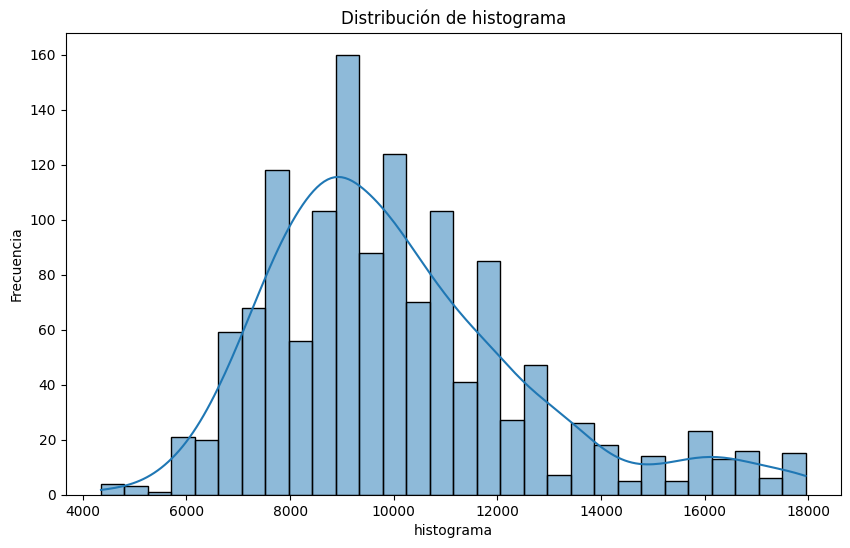

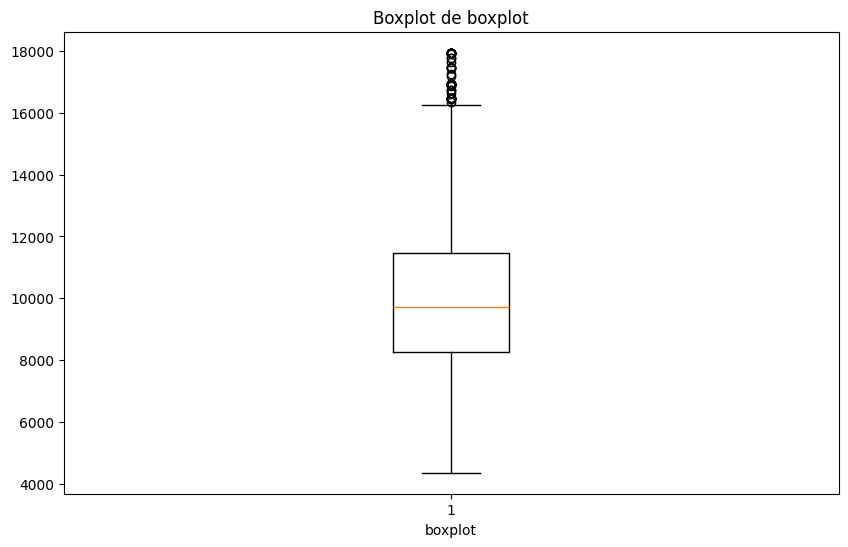

90


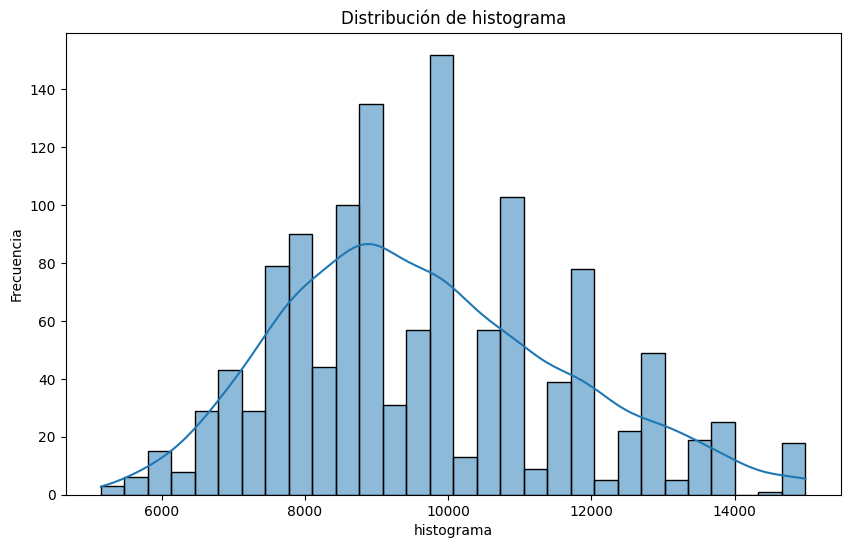

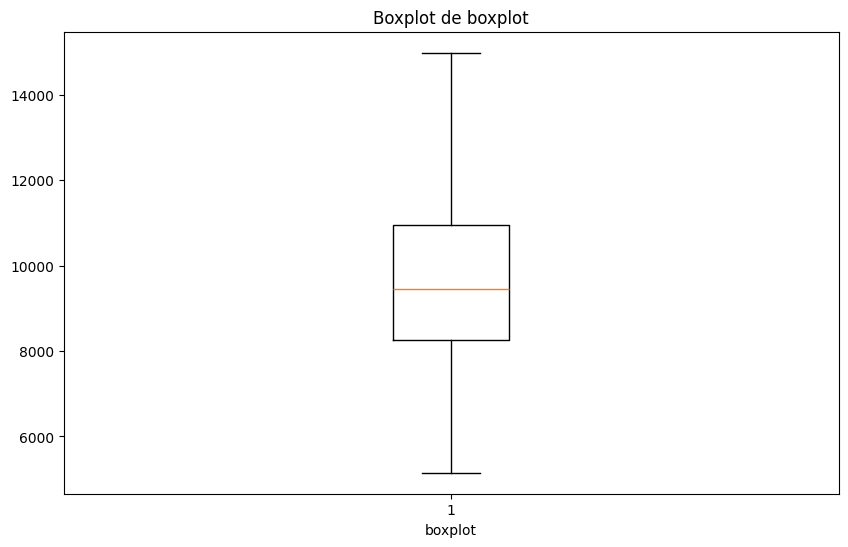

82


In [ ]:
price = df_toyota_continuas["Price"].copy()
_, mask_price = limpiar_outliers_z_core(price)
price_limpio = price[mask_price]
histogram(price_limpio)
boxplot(price_limpio)

print(len(price) - len(price_limpio))

price_limpio_l, mask_price_l = limpiar_outliers_z_core(price_limpio)

histogram(price_limpio_l)

boxplot(price_limpio_l)

print(len(price_limpio) - len(price_limpio_l))

# Eliminación de outliers en KM


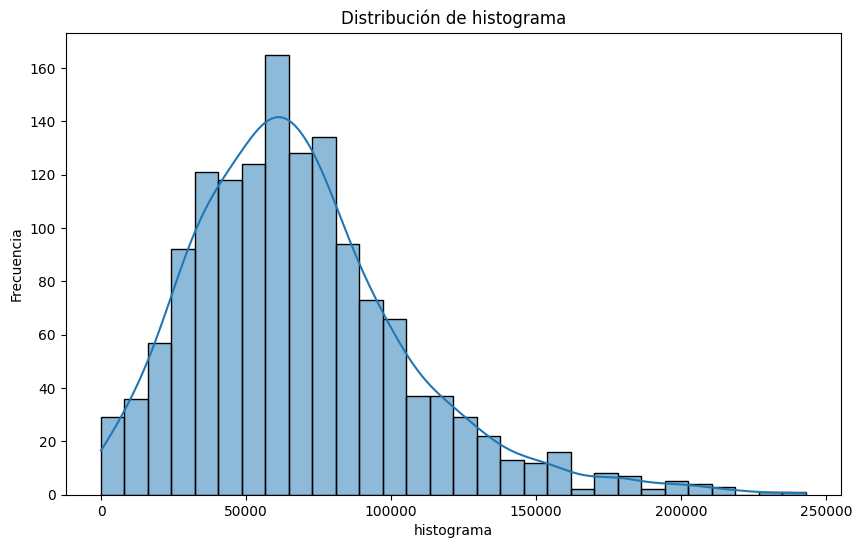

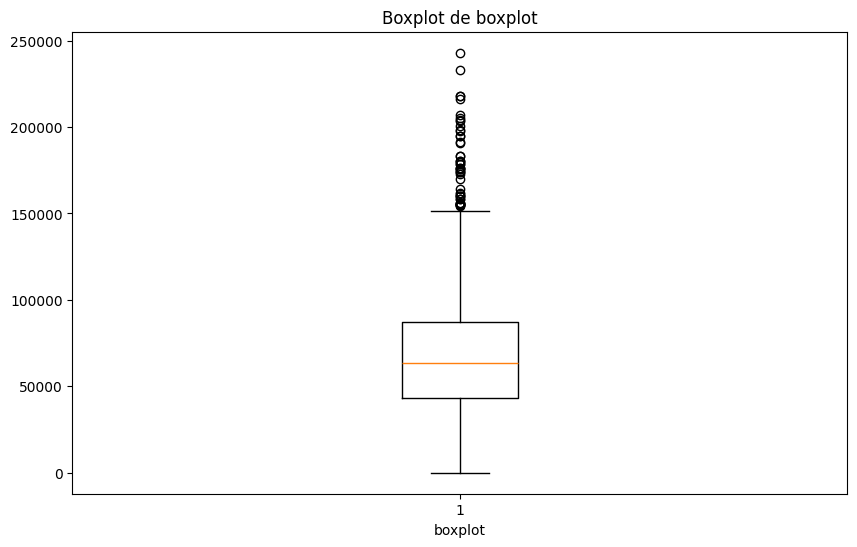

In [ ]:
histogram(df_toyota_continuas["KM"])
boxplot(df_toyota_continuas["KM"])

dicha distribucion presenta una sesgo hacia la derecha por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distribucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`


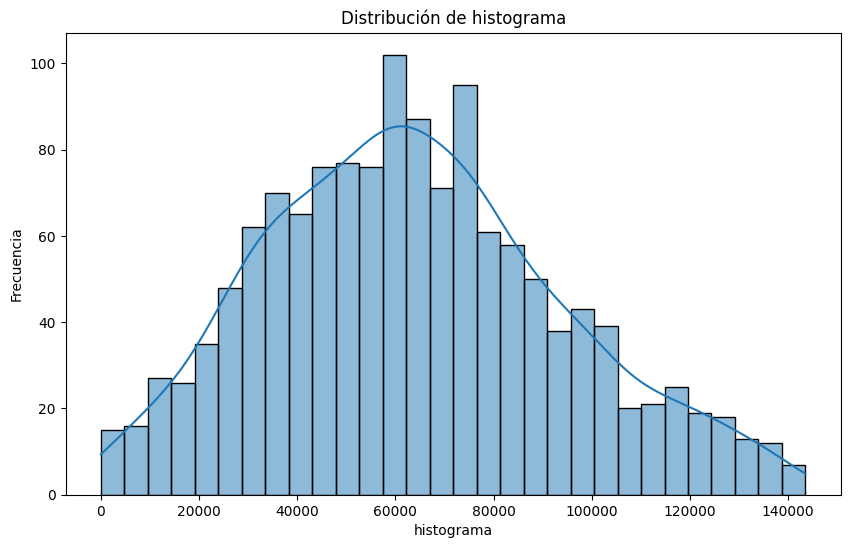

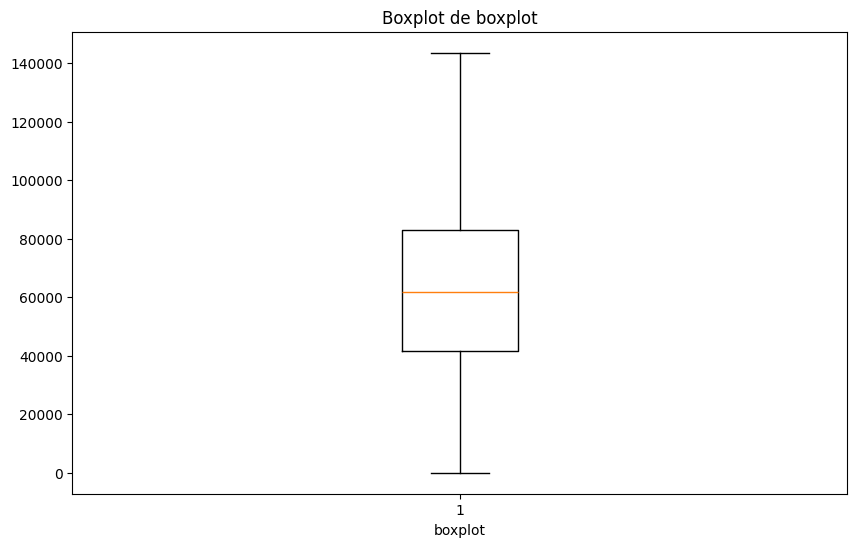

64


In [ ]:
km = df_toyota_continuas["KM"].copy()
_, mask_km = limpiar_outliers_z_core(km)
km_limpio = km[mask_km]
histogram(km_limpio)
boxplot(km_limpio)
print(len(km) - len(km_limpio))

# Eliminacion de outliers en Weight


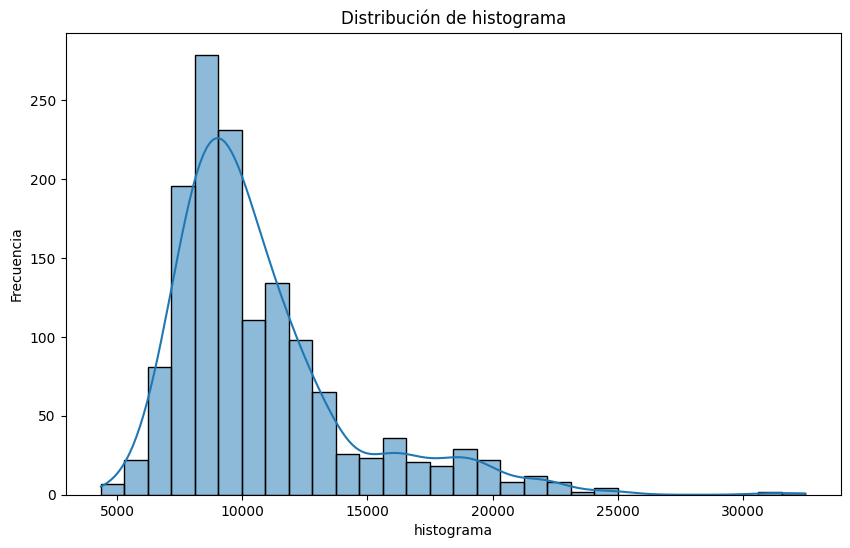

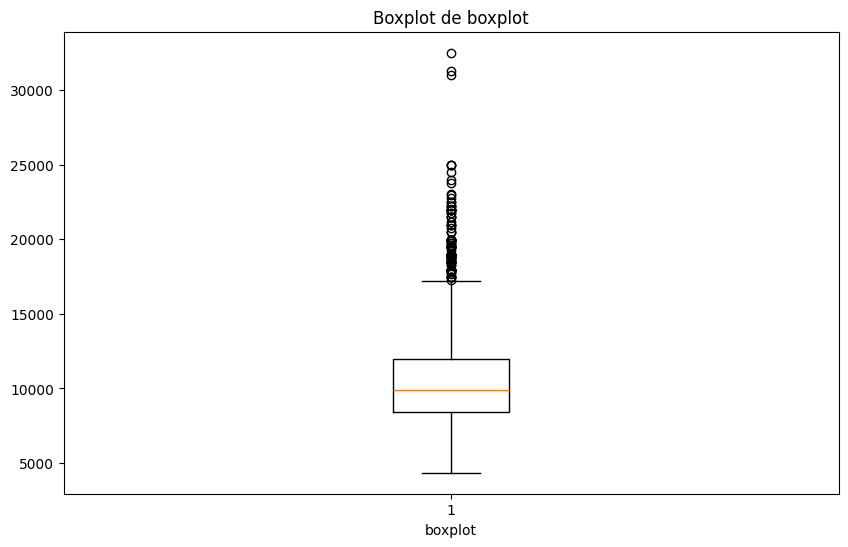

In [ ]:
histogram(df_toyota_continuas["Price"])
boxplot(df_toyota_continuas["Price"])

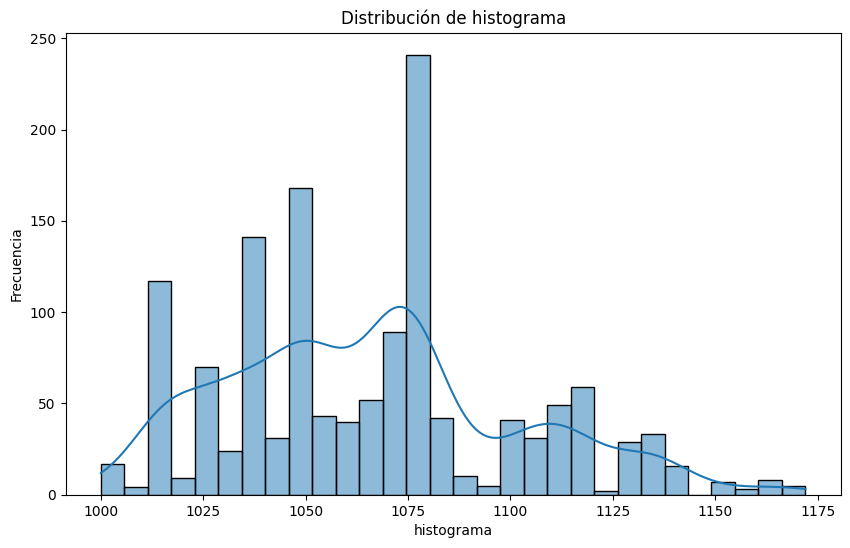

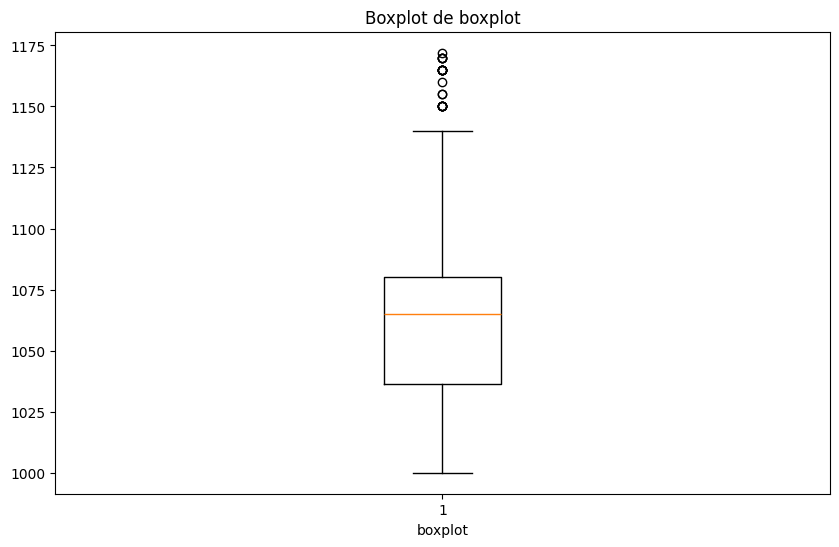

Registros removidos: 50


In [ ]:
# 1. Copiar la serie de peso
peso = df_toyota_continuas["Weight"].copy()

# 2. Obtener la máscara de valores válidos con tu función de Z-score
_, mask_peso = limpiar_outliers_z_core(peso)

# 3. Filtrar los datos limpios
peso_limpio = peso[mask_peso]

# 4. Visualizar distribución y outliers
histogram(peso_limpio)
boxplot(peso_limpio)

# 5. Imprimir cuántos registros se eliminaron
print(f"Registros removidos: {len(peso) - len(peso_limpio)}")

# Eliminacion de outliers en Age


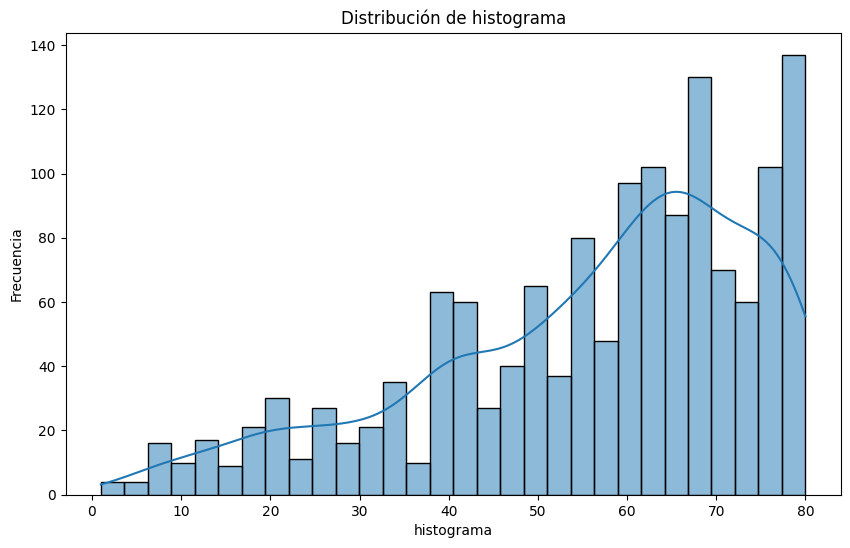

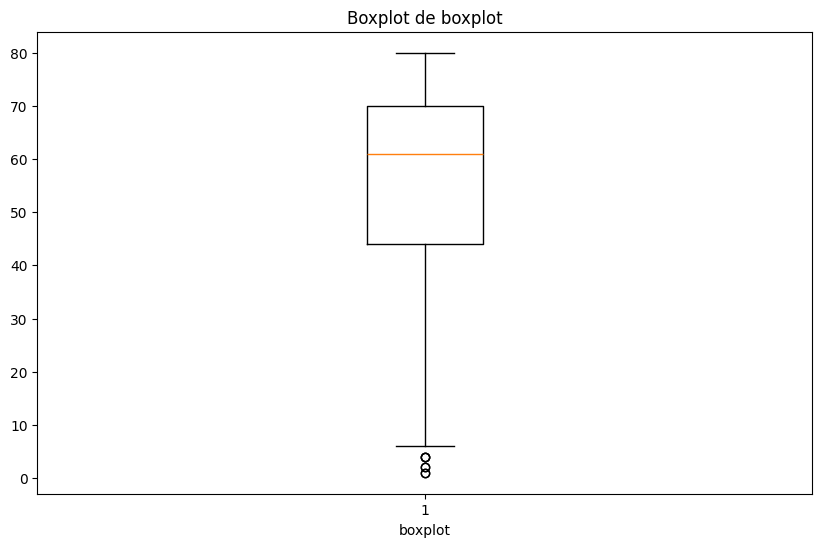

In [ ]:
histogram(df_toyota_continuas["Age_08_04"])
boxplot(df_toyota_continuas["Age_08_04"])

# Analisis Bivariado con dataframe original


In [ ]:
from sklearn.preprocessing import LabelEncoder

df["fuel_type_encoded"] = LabelEncoder().fit_transform(df["Fuel_Type"])

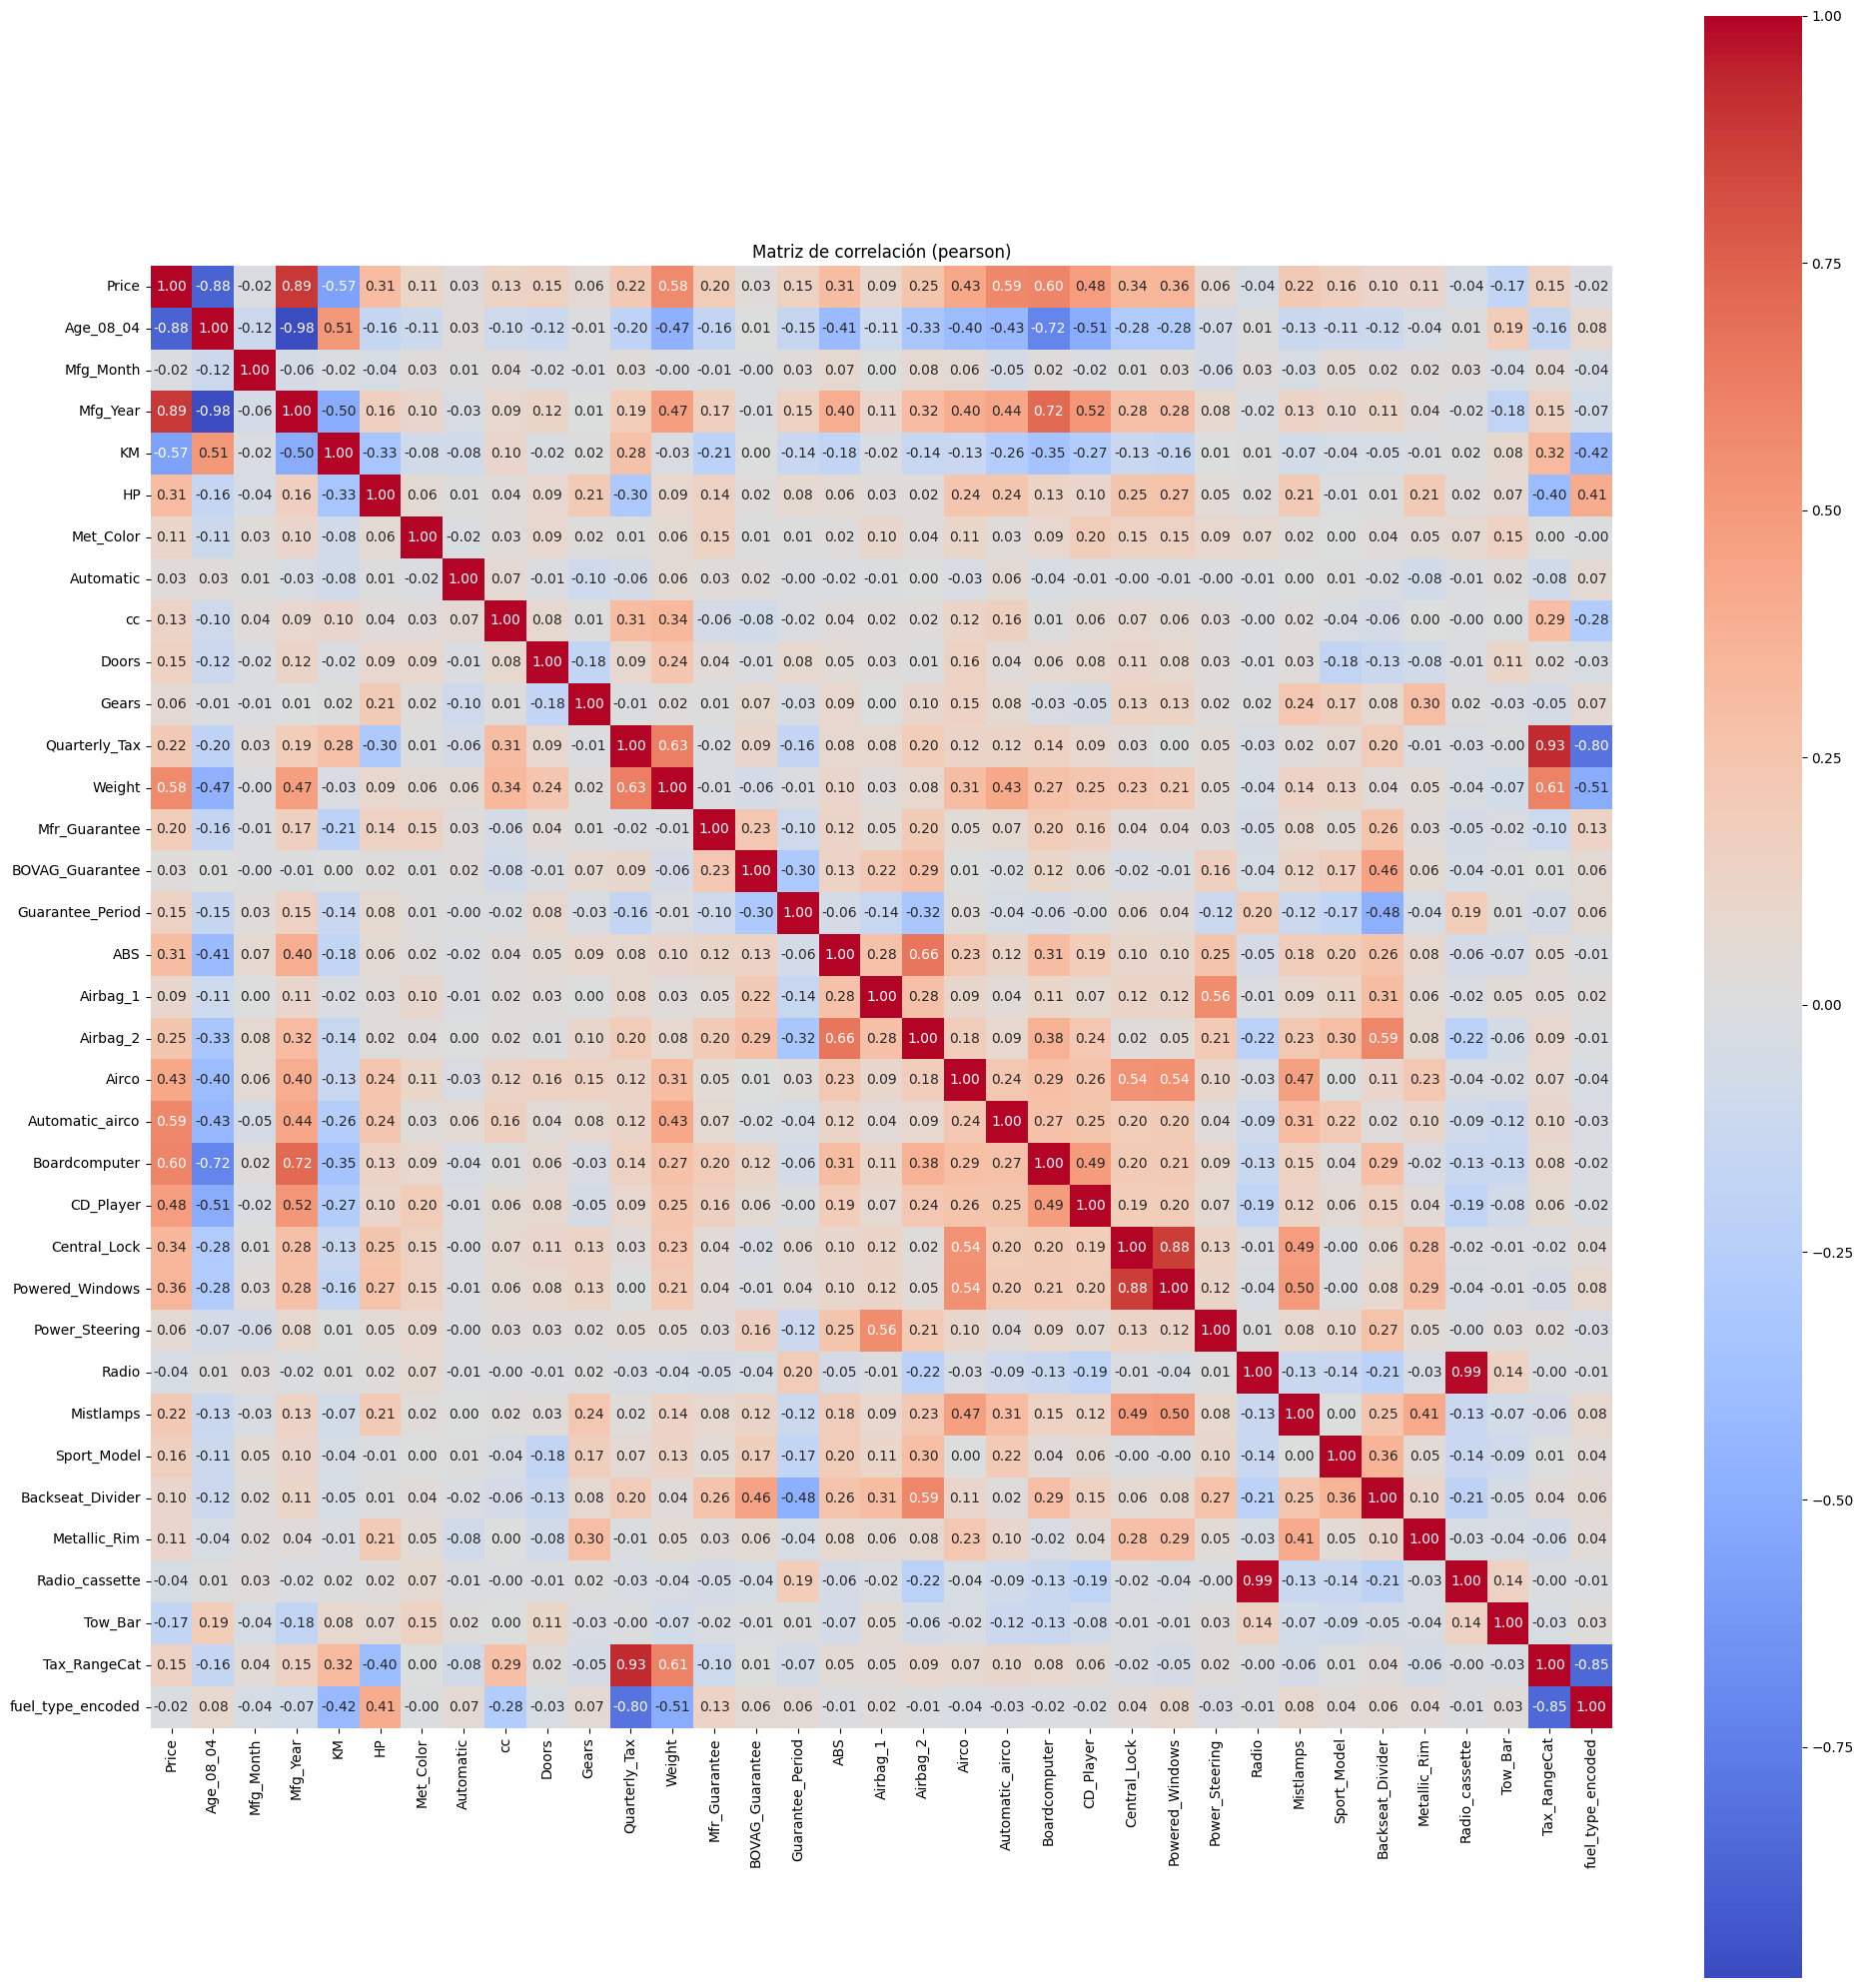

In [ ]:
matriz = mostrar_matriz_correlacion(df)

Price vs. Mfg_Year (r ≈ +0.89)

Los autos más nuevos (año de fabricación alto) tienden a tener precios más elevados. Cada año adicional aumenta fuertemente el valor.

Price vs. Age_08_04 (r ≈ –0.88)

Edad y precio son espejo: a más antigüedad (edad alta) el precio baja. Cada unidad de edad adicional desploma el valor de manera proporcional.

Mfg_Year vs. Age_08_04 (r ≈ –0.98)

Lógicamente inversas: un coche más nuevo (año alto) tiene poca “edad” registrada.

Quarterly_Tax vs. Tax_RangeCat (r ≈ +0.93)

El impuesto trimestral está prácticamente definido por la categoría de rango fiscal; son casi sinónimos cuantitativos.

Airco vs. Automatic_airco (r ≈ +0.72)

Tener aire acondicionado se superpone en gran medida con la versión “automática” de ese aire, indica redundancia de ambas variables.

Boardcomputer vs. Mfg_Year (r ≈ +0.72)

Los coches más modernos casi siempre traen ordenador de a bordo, reflejando que ese equipamiento se incorporó en modelos recientes.

Central_Lock vs. Powered_Windows (r ≈ +0.88)

El cierre centralizado y las ventanillas eléctricas suelen venir juntos en el mismo nivel de acabado.

Radio vs. Radio_cassette (r ≈ +0.99)

HP vs. Mfg_Year (r ≈ +0.72)
Modelos más nuevos tienden a tener más potencia; esta alta colinealidad puede inflar la varianza de los coeficientes si ambas variables entran al mismo tiempo.

Casi todos los coches con radio incorporan también reproductor de casete; las dos variables miden esencialmente el mismo equipamiento.


In [ ]:
# Realizamos feature selection de acuerdo a la alta correlacion
cols_to_drop = [
    "Mfg_Year",
    "Age_08_04",
    "Tax_RangeCat",
    "Automatic_airco",
    "Boardcomputer",
    "Powered_Windows",
    "Radio_cassette",
    "Fuel_Type",
    "Quarterly_Tax",
    "BOVAG_Guarantee",
    "Duplicado_de",
]

df_clean = df.drop(columns=cols_to_drop)
df_clean

,Price,Mfg_Month,KM,HP,Met_Color,Automatic,cc,Doors,Gears,Weight,Mfr_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,CD_Player,Central_Lock,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar,Engine_Size,Engine_Tech,Body_Style,Trim,fuel_type_encoded
0,13500,10,46986,90,1,0,2000,3,5,1165,0,3,1,1,1,0,0,1,1,0,0,0,1,0,0,2.0,D4D,Hatchb,Terra,1
1,13750,10,72937,90,1,0,2000,3,5,1165,0,3,1,1,1,1,1,1,1,0,0,0,1,0,0,2.0,D4D,Hatchb,Terra,1
2,13950,9,41711,90,1,0,2000,3,5,1165,1,3,1,1,1,0,0,0,1,0,0,0,1,0,0,2.0,D4D,Hatchb,Terra,1
3,14950,7,48000,90,0,0,2000,3,5,1165,1,3,1,1,1,0,0,0,1,0,0,0,1,0,0,2.0,D4D,Hatchb,Terra,1
4,13750,3,38500,90,0,0,2000,3,5,1170,1,3,1,1,1,1,0,1,1,0,1,0,1,0,0,2.0,D4D,Hatchb,Sol,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,12,20544,86,1,0,1300,3,5,1025,1,3,1,1,1,1,0,1,1,0,1,1,1,0,0,1.3,NaN,Hatchb,NaN,2
1432,10845,9,19000,86,0,0,1300,3,5,1015,0,3,1,1,1,0,0,0,1,0,0,1,1,0,0,1.3,NaN,Hatchb,Terra,2
1433,8500,10,17016,86,0,0,1300,3,5,1015,0,3,0,1,1,0,0,0,1,0,0,0,1,0,0,1.3,NaN,Hatchb,Terra,2
1434,7250,11,16916,86,1,0,1300,3,5,1015,1,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1.3,NaN,Hatchb,Terra,2


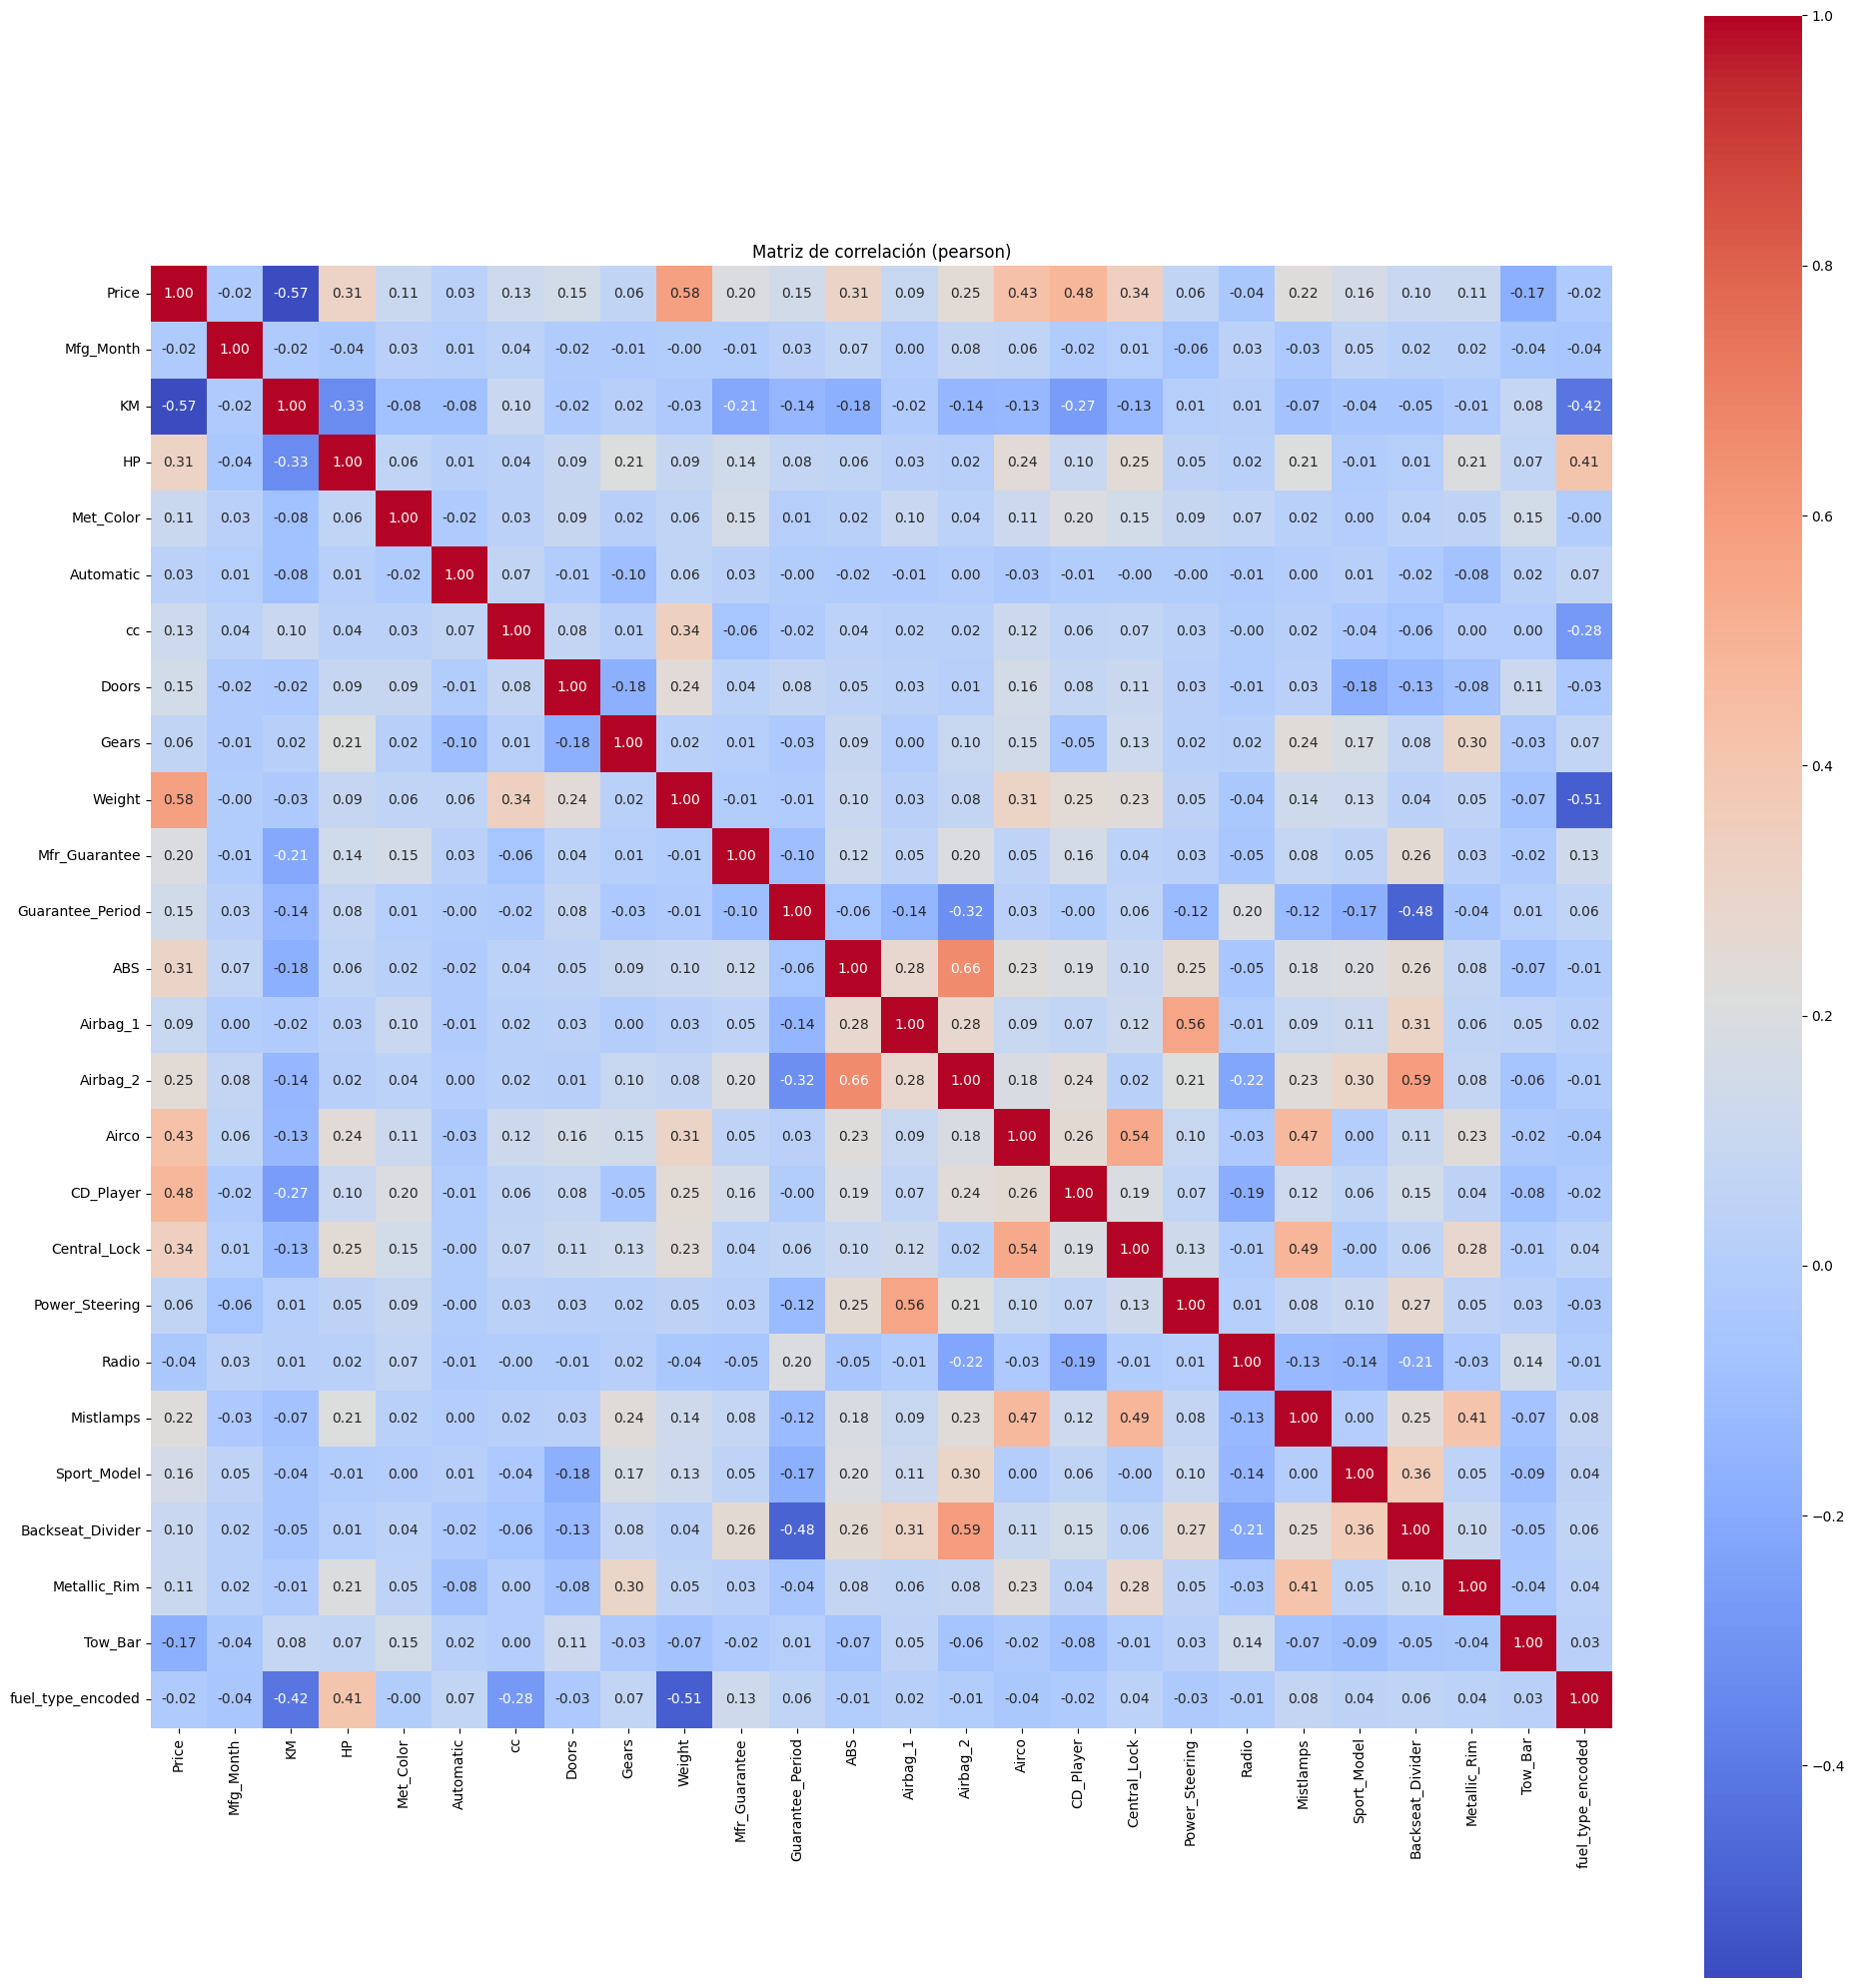

In [ ]:
matriz = mostrar_matriz_correlacion(df_clean)

In [ ]:
df.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP',
       'Met_Color', 'Automatic', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'Engine_Size', 'Engine_Tech', 'Body_Style',
       'Trim', 'Duplicado_de', 'Tax_RangeCat', 'fuel_type_encoded'],
      dtype='object')

In [ ]:
df.dtypes

Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Automatic             int64
cc                    int64
Doors                 Int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim          int64
Radio_cassette        int64
Tow_Bar               int64
Engine_Size          object
Engine_Tech         

In [ ]:
from pathlib import Path


clean_path = Path("data/clean_df.csv").resolve()
df_clean.to_csv(clean_path, index=False)
clean_path

PosixPath('/Users/tobiaspazposse/Documents/Datamining/parcial_toyotaCorolla/data/clean_df.csv')